# Statistics and Analysis of Ships and Anime 

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import ast
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [4]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3_spread.csv')
AO3['published'] = pd.to_datetime(AO3['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

# Manga
manga = pd.read_csv('mangas_clean.csv')

In [5]:
name_1 = [x for x in characters['1'].values]
name_2 = [x for x in (characters['2'].dropna().values)]
mhanames = name_1 + name_2


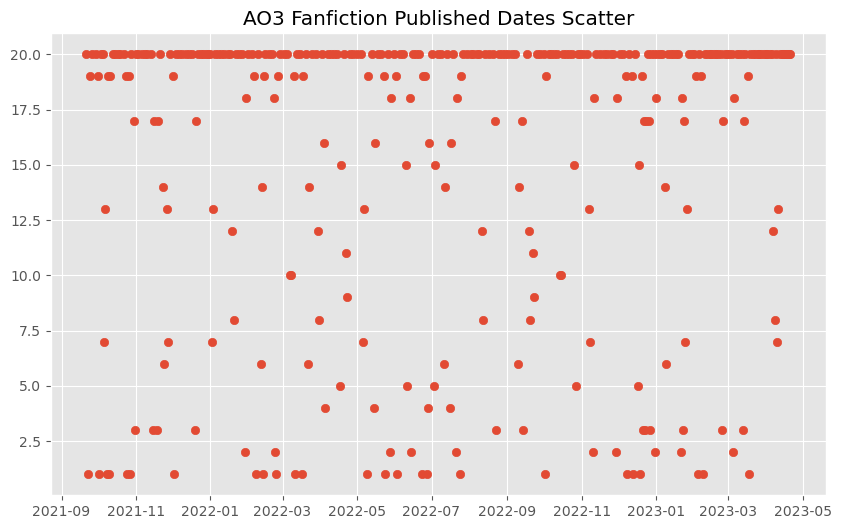

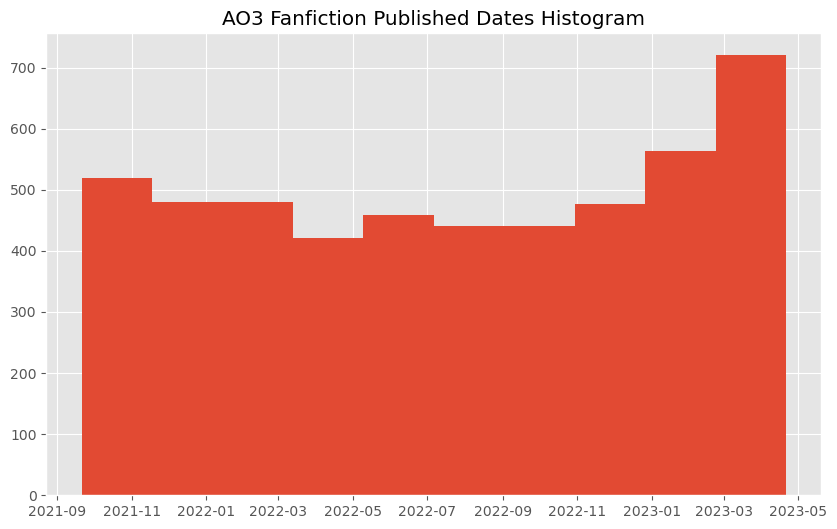

title             0
mixed fandom      0
ships             0
characters        0
hits              0
kudos           107
published         0
dtype: int64

In [6]:
date_counts = pd.DataFrame(AO3['published'].value_counts())
plt.scatter(x=date_counts.index, y='published',data=date_counts, marker='o')
plt.title('AO3 Fanfiction Published Dates Scatter')
plt.show()

AO3['published'].hist()
plt.title('AO3 Fanfiction Published Dates Histogram')
plt.show()

AO3.isna().sum()

In [7]:
len(AO3.kudos)

5000

In [8]:
season_one_anime

No.overall  No. inseason  \
0            1             1   
1            2             2   
2            3             3   
3            4             4   
4            5             5   
5            6             6   
6            7             7   
7            8             8   
8            9             9   
9           10            10   
10          11            11   
11          12            12   
12          13            13   

                                                Title         Storyboarded by  \
0   "Izuku Midoriya: Origin"Transcription: "Midori...          Kenji Nagasaki   
1   "What It Takes to Be a Hero"Transcription: "Hī...          Kenji Nagasaki   
2   "Roaring Muscles"Transcription: "Unare kin'nik...     Katsumi Terahigashi   
3   "Start Line"Transcription: "Sutaatorain" (Japa...            Tōru Yoshida   
4   "What I Can Do For Now"Transcription: "Ima Bok...        Katsuyuki Kodera   
5   "Rage, You Damned Nerd"Transcription: "Takere ...               Kō Matsuo   
6   "Deku vs. Kacchan"Transcription: "Deku bāsasu ...         Takayuki Tanaka   
7   "Bakugo's Start Line"Transcription: "Sutāto Ra...         Satomi Nakamura   
8   "Yeah, Just Do Your Best, Ida!"Transcription: ...        Katsuyuki Kodera   
9   "Encounter with the Unknown"Transcription: "Mi...         Shinji Ishihira   
10  "Game Over"Transcription: "Gēmu Ōbā" (Japanese...         Takahiro Natori   
11  "All Might"Transcription: "Ōrumaito" (Japanese...  Tōru Yoshida,Hakuyu Go   
12  "In Each of Our Hearts"Transcription: "Onoono ...        Katsuyuki Kodera   

                  Directed by     Written by Original_Air_Date  \
0              Takurō Tsukada  Yōsuke Kuroda        2016-04-03   
1            Daisuke Tsukushi  Yōsuke Kuroda        2016-04-10   
2          Yoshifumi Sasahara  Yōsuke Kuroda        2016-04-17   
3              Masato Miyoshi  Yōsuke Kuroda        2016-04-24   
4            Satoshi Nakagawa  Yōsuke Kuroda        2016-05-01   
5              Takurō Tsukada  Yōsuke Kuroda        2016-05-08   
6               Geisei Morita  Yōsuke Kuroda        2016-05-15   
7          Yoshifumi Sasahara  Yōsuke Kuroda        2016-05-22   
8                 Masashi Abe  Yōsuke Kuroda        2016-05-29   
9              Takurō Tsukada  Yōsuke Kuroda        2016-06-05   
10            Takahiro Natori  Yōsuke Kuroda        2016-06-12   
11  Tsuyoshi Tobita,Hakuyu Go  Yōsuke Kuroda        2016-06-19   
12                 Tomo Ōkubo  Yōsuke Kuroda        2016-06-26   

   English_Air_Date  
0        2018-05-05  
1        2018-05-12  
2        2018-05-19  
3        2018-06-02  
4        2018-06-09  
5        2018-06-16  
6        2018-06-23  
7        2018-06-30  
8        2018-07-07  
9        2018-07-14  
10       2018-07-21  
11       2018-07-28  
12       2018-08-04

In [9]:
dont_want = ['Parents', 'Suffering', 'Loss Of His Will', 'Niece', 'mentioned', 'Family', 'Notebooks', 'Character', 'quirk', 'Friend', 'Eriks', 'Werewolf', 'Prototype', 'Mother', 'Sibling', 'Sidekicks', 'l Jade', 'Nezuko']

In [10]:
AO3['ships'] = AO3['ships'].apply(ast.literal_eval)

In [11]:
Ships = AO3.explode('ships')['ships'].value_counts()

In [12]:
characters['First'] = characters['1']
characters = characters.set_index('First')

In [13]:
def pullship(char1, char2):
    name = []
    name2 = []
    try:
        for i in characters.loc[char1]:
            if type(i) != float:
                name.append(i)
    except:
        name.append(char1)
        
    try:
        for i in characters.loc[char2]:
            if type(i) != float:
                name2.append(i)
    except:
        name2.append(char2)
    
    ship = [name, name2]
    shipname = char1 + ' & ' + char2
    if char1 not in AO3.columns:
        AO3[char1] = 0
    if char2 not in AO3.columns:
        AO3[char2] = 0
    AO3[shipname] = 0
    for index, row in AO3.iterrows():
        for name in ship[0]:
            if name in ''.join(row['ships']):
                for name2 in ship[1]:
                    if name2 in ''.join(row['ships']):
                        if row[shipname] == 0:
                            AO3.loc[index, shipname] = 1
                        if row[char1] == 0 or row[char2] == 0:
                            AO3.loc[index, char1] =+ 1
                            AO3.loc[index, char2] =+ 1

In [14]:
Ships

Bakugou Katsuki/Midoriya Izuku                             751
Aizawa Shouta | Eraserhead/Yamada Hizashi | Present Mic    449
Bakugou Katsuki/Kirishima Eijirou                          418
Bakugou Katsuki & Midoriya Izuku                           370
Aizawa Shouta | Eraserhead & Midoriya Izuku                318
                                                          ... 
Yamada Hizashi & Castiel                                     1
Aizawa Shouta & Castiel                                      1
eriko x ai x tora                                            1
bunnydance(emi shigeraki x miruko)                           1
Dabi | Todoroki Touya & Sensei | All For One                 1
Name: ships, Length: 2874, dtype: int64

In [15]:
pullship('Deku', 'Katsuki')
pullship('Aizawa', 'Yamada Hizashi')
pullship('Aizawa', 'Deku')
pullship('Katsuki', 'Enjiro')
pullship('Deku', 'Todoroki Sho')
pullship('Dabi', 'Keigo')
pullship('Deku', 'Uraraka')
pullship('Deku', 'All Might')
pullship('Deku', 'Class')
pullship('Denki', 'Shinsou Hitoshi')
pullship('Deku', 'Shinsou Hitoshi')
pullship('Katsuki', 'Reader')
pullship('Katsuki', 'Todoroki Sho')
pullship('Deku', 'Yamada Hizashi')
pullship('Mina', 'Eijirou')
pullship('Jirou Kyouka', 'Denki')
pullship('Deku', 'Shigaraki Tomura')
pullship('Aizawa', 'Shinsou Hitoshi')
pullship('Deku', 'Nedzu')
pullship('Deku', 'Reader')

In [16]:
AO3 = AO3.rename(columns = {'Aizawa & Shinsou Hitoshi': 'Aizawa & Shinsou', 'Shinsou Hitoshi': 'Shinsou',
                            'Jirou Kyouka & Denki': 'Jirou & Denki','Jirou Kyouka': 'Jirou',
                            'Mina & Eijirou': 'Mina & Kirashima', 'Eijirou': 'Kirashima',
                            'Deku & Yamada Hizashi': 'Deku & Prez Mic', 'Yamada Hizashi': 'Prez Mic',
                            'Katsuki & Todoroki Sho': 'Bakugo & Shoto',
                            'Todoroki Sho': 'Shoto', 'Katsuki & Reader': 'Bakugo & Reader', 
                            'Katsuki': 'Bakugo', 'Deku & Shinsou Hitoshi': 'Deku & Shinsou',
                            'Denki & Shinsou Hitoshi': 'Denki & Shinsou', 'Dabi & Keigo': 'Dabi & Hawks',
                            'Keigo': 'Hawks', 'Deku & Todoroki Sho': 'Deku & Shoto',
                            'Katsuki & Enjiro': 'Bakugo & Kirishima', 'Deku & Katsuki': 'Deku & Bakugo',
                            'Aizawa & Yamada Hizashi': 'Aizawa & Prez Mic'})


In [17]:
AO3.sort_values(by = ['published'], ascending = [True])

title  \
4999                            Devoid of life & Music?   
4980  all of a sudden, im in the future but at least...   
4981                             Somewhere Only We Know   
4982                                 The Ties That Bind   
4983                            The Day after Yesterday   
...                                                 ...   
17                               Like Flickering Flames   
18                                  In the middle of it   
19                                      All That's Left   
10                                        Crimson Tears   
0                                                 CHARM   

                                           mixed fandom  \
4999  ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
4980  ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
4981  ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
4982  ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
4983  ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
...                                                 ...   
17    ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
18    ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
19    ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
10    ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   
0     ['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...   

                                                  ships  \
4999                                                 []   
4980                                                 []   
4981                   [Bakugou Katsuki/Uraraka Ochako]   
4982  [Todoroki Shouto/Yaoyorozu Momo, Todoroki Shou...   
4983  [Bakugou Katsuki/Midoriya Izuku/Todoroki Shout...   
...                                                 ...   
17         [Dabi | Todoroki Touya/Takami Keigo | Hawks]   
18    [Dabi | Todoroki Touya/Shigaraki Tomura | Shim...   
19                                                   []   
10    [Kirishima Eijirou/Midoriya Izuku, Bakugou Kat...   
0     [Dabi | Todoroki Touya/Reader, Aizawa Shouta |...   

                                             characters   hits  kudos  \
4999  ['Midoriya Izuku', 'Midoriya Inko', 'Bakugou K...      5    NaN   
4980  ['Original Characters', 'Aizawa Shouta | Erase...     64    5.0   
4981  ['Uraraka Ochako', 'Bakugou Katsuki', 'Shinsou...   1255  111.0   
4982              ['Todoroki Shouto', 'Yaoyorozu Momo']    765   76.0   
4983  ['Midoriya Izuku', 'Todoroki Shouto', 'Bakugou...  14262  748.0   
...                                                 ...    ...    ...   
17    ['Dabi | Todoroki Touya', 'Takami Keigo | Hawk...    376   55.0   
18    ['Shigaraki Tomura | Shimura Tenko', 'Dabi | T...      6    NaN   
19    ['Midoriya Izuku', 'Aizawa Shouta | Eraserhead...   8720  320.0   
10    ['Midoriya Izuku', 'Bakugou Katsuki', 'Kirishi...      0    NaN   
0     ['Dabi | Todoroki Touya', 'Aizawa Shouta | Era...   1028   44.0   

      published  Deku  Bakugo  Deku & Bakugo  ...  Kirashima  \
4999 2021-09-21     0       0              0  ...          0   
4980 2021-09-21     0       0              0  ...          0   
4981 2021-09-21     0       0              0  ...          0   
4982 2021-09-21     0       0              0  ...          0   
4983 2021-09-21     1       1              1  ...          0   
...         ...   ...     ...            ...  ...        ...   
17   2023-04-21     0       0              0  ...          0   
18   2023-04-21     0       0              0  ...          0   
19   2023-04-21     0       0              0  ...          0   
10   2023-04-21     1       1              1  ...          0   
0    2023-04-21     1       1              1  ...          0   

      Mina & Kirashima  Jirou  Jirou & Denki  Shigaraki Tomura  \
4999                 0      0              0                 0   
4980                 0      0              0                 0   
4981                 0      0              0                 0   
4982         

In [18]:
for col in AO3.columns:
    print(col)
    display(AO3[col].value_counts())

title


Hiraeth                      3
Sick                         3
Alley Cat                    2
Sun and Moon                 2
Return                       2
                            ..
Dhampir and Baku-San         1
the shackles of your soul    1
Loving Kacchan               1
Explosive Storm              1
Devoid of life & Music?      1
Name: title, Length: 4962, dtype: int64

mixed fandom


['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia']                                                                                                                                                                                                                                3910
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia (Anime & Manga)']                                                                                                                                                                                                                 681
['Fandoms:\nNaruto, 僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia']                                                                                                                                                                                                                           7
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia, Naruto']                                 

ships


[]                                                                                                                                                                                                                                                                   461
[Bakugou Katsuki/Midoriya Izuku]                                                                                                                                                                                                                                     389
[Bakugou Katsuki/Kirishima Eijirou]                                                                                                                                                                                                                                  151
[Bakugou Katsuki/Todoroki Shouto]                                                                                                                                                                            

characters


[]                                                                                                                                                                                                                                        204
['Bakugou Katsuki', 'Midoriya Izuku']                                                                                                                                                                                                     171
['Bakugou Katsuki', 'Kirishima Eijirou']                                                                                                                                                                                                   68
['Dabi | Todoroki Touya', 'Takami Keigo | Hawks']                                                                                                                                                                                          45
['Midoriya Izuku', 'Bakugou Katsuki']           

hits


24       11
30       10
37       10
33       10
260       9
         ..
1777      1
1015      1
2734      1
1782      1
11338     1
Name: hits, Length: 2992, dtype: int64

kudos


1.0       103
5.0        84
2.0        70
3.0        70
4.0        69
         ... 
677.0       1
406.0       1
263.0       1
773.0       1
1733.0      1
Name: kudos, Length: 934, dtype: int64

published


2023-04-21    20
2022-05-31    20
2022-07-27    20
2022-07-19    20
2023-04-20    20
              ..
2022-02-13     1
2022-02-07     1
2022-12-08     1
2023-03-18     1
2022-12-13     1
Name: published, Length: 328, dtype: int64

Deku


0    2948
1    2052
Name: Deku, dtype: int64

Bakugo


0    3434
1    1566
Name: Bakugo, dtype: int64

Deku & Bakugo


0    3683
1    1317
Name: Deku & Bakugo, dtype: int64

Aizawa


0    4168
1     832
Name: Aizawa, dtype: int64

Prez Mic


0    4456
1     544
Name: Prez Mic, dtype: int64

Aizawa & Prez Mic


0    4461
1     539
Name: Aizawa & Prez Mic, dtype: int64

Aizawa & Deku


0    4421
1     579
Name: Aizawa & Deku, dtype: int64

Enjiro


0    5000
Name: Enjiro, dtype: int64

Bakugo & Kirishima


0    5000
Name: Bakugo & Kirishima, dtype: int64

Shoto


0    4248
1     752
Name: Shoto, dtype: int64

Deku & Shoto


0    4416
1     584
Name: Deku & Shoto, dtype: int64

Dabi


0    4725
1     275
Name: Dabi, dtype: int64

Hawks


0    4725
1     275
Name: Hawks, dtype: int64

Dabi & Hawks


0    4725
1     275
Name: Dabi & Hawks, dtype: int64

Uraraka


0    4633
1     367
Name: Uraraka, dtype: int64

Deku & Uraraka


0    4633
1     367
Name: Deku & Uraraka, dtype: int64

All Might


0    4751
1     249
Name: All Might, dtype: int64

Deku & All Might


0    4751
1     249
Name: Deku & All Might, dtype: int64

Class


0    4789
1     211
Name: Class, dtype: int64

Deku & Class


0    4789
1     211
Name: Deku & Class, dtype: int64

Denki


0    4646
1     354
Name: Denki, dtype: int64

Shinsou


0    4419
1     581
Name: Shinsou, dtype: int64

Denki & Shinsou


0    4720
1     280
Name: Denki & Shinsou, dtype: int64

Deku & Shinsou


0    4590
1     410
Name: Deku & Shinsou, dtype: int64

Reader


0    4847
1     153
Name: Reader, dtype: int64

Bakugo & Reader


0    4876
1     124
Name: Bakugo & Reader, dtype: int64

Bakugo & Shoto


0    4463
1     537
Name: Bakugo & Shoto, dtype: int64

Deku & Prez Mic


0    4679
1     321
Name: Deku & Prez Mic, dtype: int64

Mina


0    4813
1     187
Name: Mina, dtype: int64

Kirashima


0    4813
1     187
Name: Kirashima, dtype: int64

Mina & Kirashima


0    4813
1     187
Name: Mina & Kirashima, dtype: int64

Jirou


0    4853
1     147
Name: Jirou, dtype: int64

Jirou & Denki


0    4853
1     147
Name: Jirou & Denki, dtype: int64

Shigaraki Tomura


0    4859
1     141
Name: Shigaraki Tomura, dtype: int64

Deku & Shigaraki Tomura


0    4859
1     141
Name: Deku & Shigaraki Tomura, dtype: int64

Aizawa & Shinsou


0    4691
1     309
Name: Aizawa & Shinsou, dtype: int64

Nedzu


0    4952
1      48
Name: Nedzu, dtype: int64

Deku & Nedzu


0    4952
1      48
Name: Deku & Nedzu, dtype: int64

Deku & Reader


0    4930
1      70
Name: Deku & Reader, dtype: int64

<AxesSubplot:>

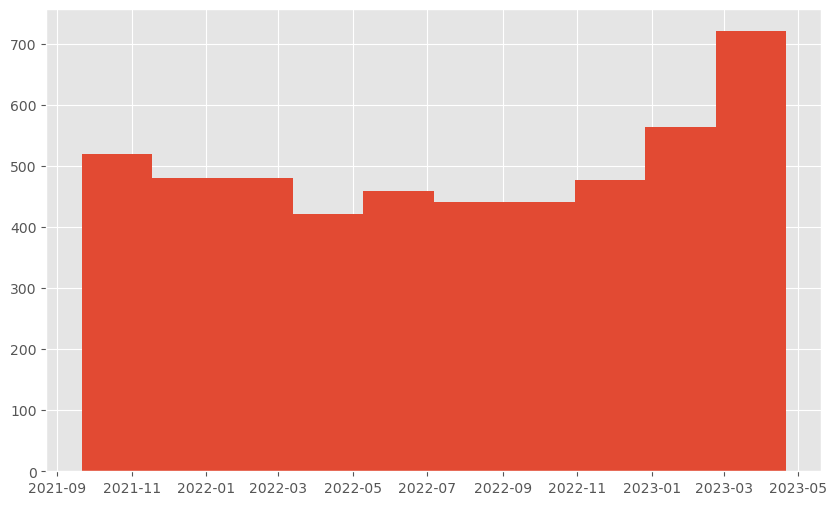

In [19]:
AO3['published'].hist()


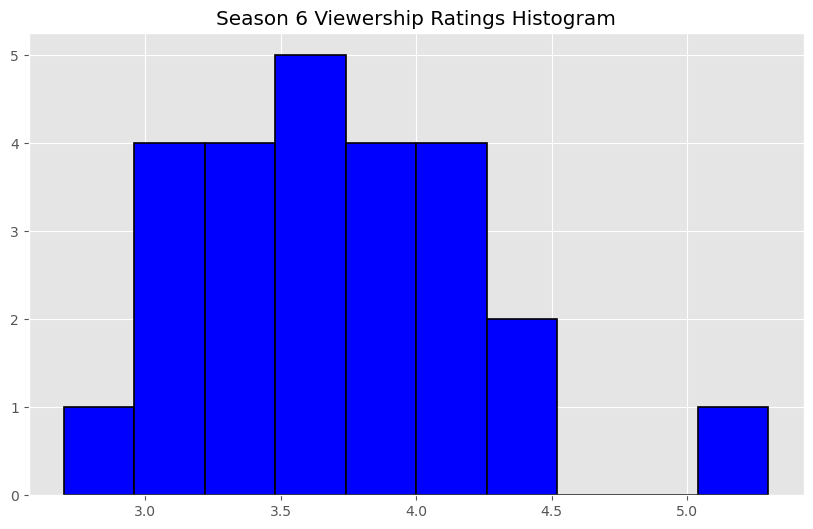

In [20]:
plt.hist(x='Viewership rating', data=season_six_anime, bins=10, color='blue', edgecolor='black', linewidth=1.2)
plt.title('Season 6 Viewership Ratings Histogram')
plt.show()

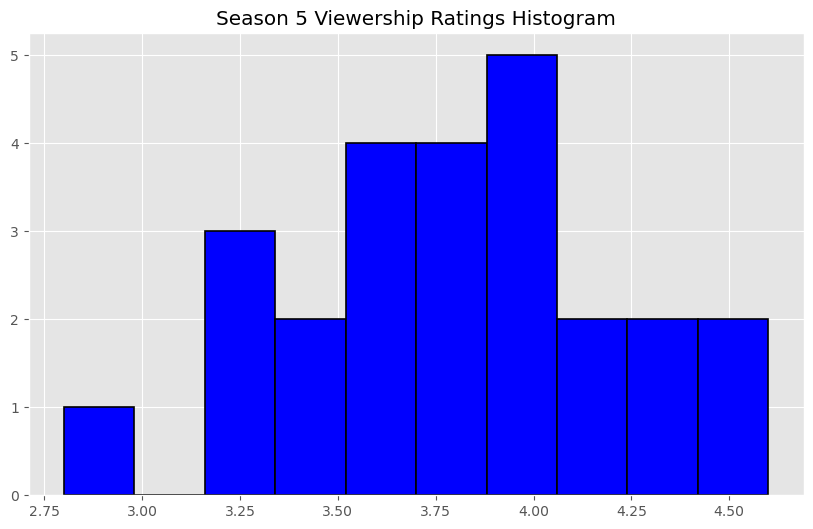

In [21]:
plt.hist(x='Viewership rating', data=season_five_anime, bins=10, color='blue', edgecolor='black', linewidth=1.2)
plt.title('Season 5 Viewership Ratings Histogram')
plt.show()

In [22]:
season_six_anime['English_Air_Date'] = pd.to_datetime(season_six_anime['English_Air_Date'])
season_five_anime['English_Air_Date'] = pd.to_datetime(season_five_anime['English_Air_Date'])
season_six_anime['Original_Air_Date'] = pd.to_datetime(season_six_anime['Original_Air_Date'])
season_five_anime['Original_Air_Date'] = pd.to_datetime(season_five_anime['Original_Air_Date'])

In [23]:
# Obtaining just the characters presence or absence in the fanfiction.
character_presence = AO3[['published', 'Deku', 'Bakugo', 'Aizawa', 'Prez Mic', 'Enjiro',
       'Shoto', 'Dabi', 'Hawks', 'Uraraka', 'All Might', 'Class',
       'Denki', 'Shinsou', 'Reader', 'Mina', 'Kirashima', 'Jirou',
       'Shigaraki Tomura', 'Nedzu', 'Deku & Nedzu', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Reader']]

# Verifying the maximum number is 1, to ensure the binary coding worked. 
check = character_presence.describe()
check 

character_presence.set_index('published', inplace=True)
character_presence

Deku  Bakugo  Aizawa  Prez Mic  Enjiro  Shoto  Dabi  Hawks  \
published                                                                
2023-04-21     1       1       1         0       0      1     1      1   
2023-04-21     1       1       0         0       0      1     0      0   
2023-04-21     1       1       0         0       0      1     0      0   
2023-04-21     1       0       0         0       0      0     0      0   
2023-04-21     1       1       0         0       0      0     0      0   
...          ...     ...     ...       ...     ...    ...   ...    ...   
2021-09-21     0       0       1         0       0      0     0      0   
2021-09-21     0       0       0         0       0      0     1      1   
2021-09-21     0       0       0         0       0      0     0      0   
2021-09-21     0       0       0         0       0      0     0      0   
2021-09-21     0       0       0         0       0      0     0      0   

            Uraraka  All Might  ...  Denki & Shinsou  Deku & Shinsou  \
published                       ...                                    
2023-04-21        0          0  ...                1               1   
2023-04-21        1          1  ...                0               0   
2023-04-21        1          0  ...                1               1   
2023-04-21        0          1  ...                0               0   
2023-04-21        0          0  ...                0               0   
...             ...        ...  ...              ...             ...   
2021-09-21        0          0  ...                0               0   
2021-09-21        0          0  ...                0               0   
2021-09-21        0          0  ...                0               0   
2021-09-21        0          0  ...                0               0   
2021-09-21        0          0  ...                0               0   

            Bakugo & Reader  Bakugo & Shoto  Deku & Prez Mic  \
published                                                      
2023-04-21                1               1                0   
2023-04-21                0               1                0   
2023-04-21                1               1                0   
2023-04-21                0               0                0   
2023-04-21                0               0                0   
...                     ...             ...              ...   
2021-09-21                0               0                0   
2021-09-21                0               0                0   
2021-09-21                0               0                0   
2021-09-21                0               0                0   
2021-09-21                0               0                0   

            Mina & Kirashima  Jirou & Denki  Deku & Shigaraki Tomura  \
published                                                              
2023-04-21                 0              0                        1   
2023-04-21                 1              0                        0   
2023-04-21                 1              1                        0   
2023-04-21                 0              0                        1   
2023-04-21                 0              0                        0   
...                      ...            ...                      ...   
2021-09-21                 0              0                        0   
2021-09-21                 0              0                        0   
2021-09-21                 0              0                        0   
2021-09-21                 0              0                        0   
2021-09-21                 0              0                        0   

            Aizawa & Shinsou  Deku & Reader  
published                                    
2023-04-21                 1              1  
2023-04-21                 0              0  
2023-04-21                 0              1  
2023-04-21                 0              0  
2023-04-21                 0              0  
...                 

In [24]:
character_presence.apply(pd.Series.value_counts)

Deku  Bakugo  Aizawa  Prez Mic  Enjiro  Shoto  Dabi  Hawks  Uraraka  \
0  2948    3434    4168      4456  5000.0   4248  4725   4725     4633   
1  2052    1566     832       544     NaN    752   275    275      367   

   All Might  ...  Denki & Shinsou  Deku & Shinsou  Bakugo & Reader  \
0       4751  ...             4720            4590             4876   
1        249  ...              280             410              124   

   Bakugo & Shoto  Deku & Prez Mic  Mina & Kirashima  Jirou & Denki  \
0            4463             4679              4813           4853   
1             537              321               187            147   

   Deku & Shigaraki Tomura  Aizawa & Shinsou  Deku & Reader  
0                     4859              4691           4930  
1                      141               309             70  

[2 rows x 39 columns]

In [25]:
season_six_anime

No.overall  No. inseason  \
0          114             1   
1          115             2   
2          116             3   
3          117             4   
4          118             5   
5          119             6   
6          120             7   
7          121             8   
8          122             9   
9          123            10   
10         124            11   
11         125            12   
12         126            13   
13         127            14   
14         128            15   
15         129            16   
16         130            17   
17         131            18   
18         132            19   
19         133            20   
20         134            21   
21         135            22   
22         136            23   
23         137            24   
24         138            25   

                                                Title    Storyboarded by  \
0   "A Quiet Beginning"Transcription: "Shizukana H...         Tomo Ōkubo   
1   "Mirko, the No. 5 Hero"Transcription: "Nanbā F...        Shōji Ikeno   
2                                     "One's Justice"   Takashi Kawabata   
3   "Inheritance"Transcription: "Keishō" (Japanese...      Motonobu Hori   
4   "The Thrill of Destruction"Transcription: "Ham...      Michio Fukuda   
5   "Encounter, Part 2"Transcription: "Enkauntā 2"...         Tomo Ōkubo   
6   "Disaster Walker"Transcription: "Dizasutā Wōkā...        Shōji Ikeno   
7   "League of Villains vs. U.A. Students"Transcri...          Kō Matsuo   
8   "Katsuki Bakugo: Rising"Transcription: "Bakugō...  Tomohiro Kamitani   
9   "The Ones Within Us"Transcription: "Bokura no ...         Tomo Ōkubo   
10  "Dabi's Dance"Transcription: "Dabi Dansu" (Jap...        Shōji Ikeno   
11  "Threads of Hope"Transcription: "Ichiru no Kib...       Minoru Ōhara   
12  "Final Performance"Transcription: "Rasuto Sutē...         Tomo Ōkubo   
13  "Hellish Hell"Transcription: "Gokukoku, Jigoku...   Takashi Kawabata   
14  "Tartarus"Transcription: "Tarutarosu" (Japanes...         Tomo Ōkubo   
15  "The Hellish Todoroki Family, Part 2"Transcrip...   Takashi Kawabata   
16  "The Wrong Way to Put Out a Fire"Transcription...        Shōji Ikeno   
17  "Izuku Midoriya and Tomura Shigaraki"Transcrip...        Shōji Ikeno   
18  "Full Power!!"Transcription: "Zenryoku!!" (Jap...  Tomohiro Kamitani   
19  "Hired Gun"Transcription: "Shikaku" (Japanese:...        Shinji Satō   
20  "The Lovely Lady Nagant"Transcription: "Uruwas...         Tomo Ōkubo   
21  "Friend"Transcription: "Tomodachi" (Japanese: ...        Shōji Ikeno   
22  "Deku vs. Class A"Transcription: "Deku Bāsasu ...        Shinji Satō   
23  "A Young Woman's Declaration"Transcription: "M...          Kō Matsuo   
24  "No Man Is an Island"Transcription: "Tsunagaru...        Shinji Satō   

          Directed by     Written by  Viewership rating Original_Air_Date  \
0          Tomo Ōkubo  Yōsuke Kuroda                3.9        2022-10-01   
1         Shōji Ikeno  Yōsuke Kuroda                3.1        2022-10-08   
2     Tsuyoshi Tobita  Yōsuke Kuroda                4.0        2022-10-15   
3      Kazuma Komatsu  Yōsuke Kuroda                4.0        2022-10-22   
4          Ikurō Satō  Yōsuke Kuroda                4.4        2022-10-29   
5          Tomo Ōkubo  Yōsuke Kuroda                3.6        2022-11-05   
6         Shōji Ikeno  Yōsuke Kuroda                3.4        2022-11-12   
7      Kazuma Komatsu  Yōsuke Kuroda                3.4        2022-11-19   
8   Tomohiro Kamitani  Yōsuke Kuroda                3.7        2022-11-26   
9          Tomo Ōkubo  Yōsuke Kuroda                5.3        2022-12-03   
10        Shōji Ikeno  Yōsuke Kuroda                3.9        2022-12-10   
11         Ikurō Satō  Yōsuke Kuroda                3.7        2022-12-17   
12    Tsuyoshi Tobita  Yōsuke Kuroda                4.3        2022-12-24   
13        Shōji Ikeno  Yōsuke Kuroda                4.1        2023-01-07   
14         Tomo Ōkubo  Yōsuke Kuroda   

In [26]:
ships_dates = AO3.drop(columns = ['title', 'mixed fandom', 'ships', 'characters'])
ships_dates.describe()
ships_dates['sum hits'] = ships_dates['hits']
ships_dates['sum kudos'] = ships_dates['kudos']

In [27]:
ships_dates_group = ships_dates.groupby(['published']).agg({'hits': 'mean','sum hits': 'sum', 'kudos': 'mean', 'sum kudos': 'sum', 'Deku': 'sum', 'Bakugo': 'sum', 'Deku & Bakugo': 'sum', 'Aizawa': 'sum',
       'Prez Mic': 'sum', 'Aizawa & Prez Mic': 'sum', 'Aizawa & Deku': 'sum', 'Enjiro': 'sum',
       'Bakugo & Kirishima': 'sum', 'Shoto': 'sum', 'Deku & Shoto': 'sum', 'Dabi': 'sum', 'Hawks': 'sum',
       'Dabi & Hawks': 'sum', 'Uraraka': 'sum', 'Deku & Uraraka': 'sum', 'All Might': 'sum',
       'Deku & All Might': 'sum', 'Class': 'sum', 'Deku & Class': 'sum', 'Denki': 'sum', 'Shinsou': 'sum',
       'Denki & Shinsou': 'sum', 'Deku & Shinsou': 'sum', 'Reader': 'sum', 'Bakugo & Reader': 'sum',
       'Bakugo & Shoto': 'sum', 'Deku & Prez Mic': 'sum', 'Mina': 'sum', 'Kirashima': 'sum',
       'Mina & Kirashima': 'sum', 'Jirou': 'sum', 'Jirou & Denki': 'sum', 'Shigaraki Tomura': 'sum',
       'Deku & Shigaraki Tomura': 'sum', 'Aizawa & Shinsou': 'sum', 'Nedzu': 'sum', 'Deku & Nedzu': 'sum',
       'Deku & Reader': 'sum'})

In [28]:
ships_only = ships_dates_group.loc[:,['Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]

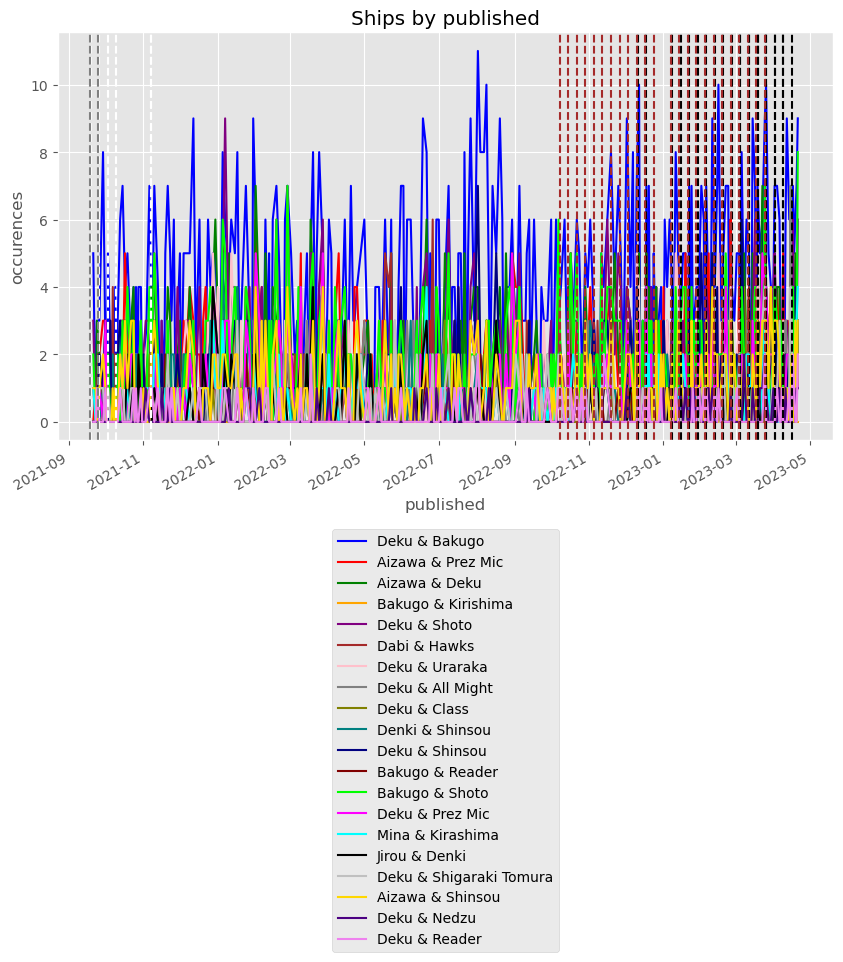

In [29]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


ships_only.plot(color = colors)
plt.ylabel('occurences')
plt.title('Ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
for j in range(19, 25):
    plt.axvline(x=season_five_anime['English_Air_Date'][j], color='white', linestyle = '--')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
for j in range(23, 25):
    plt.axvline(x=season_five_anime['Original_Air_Date'][j], color='grey', linestyle = '--')
plt.show()

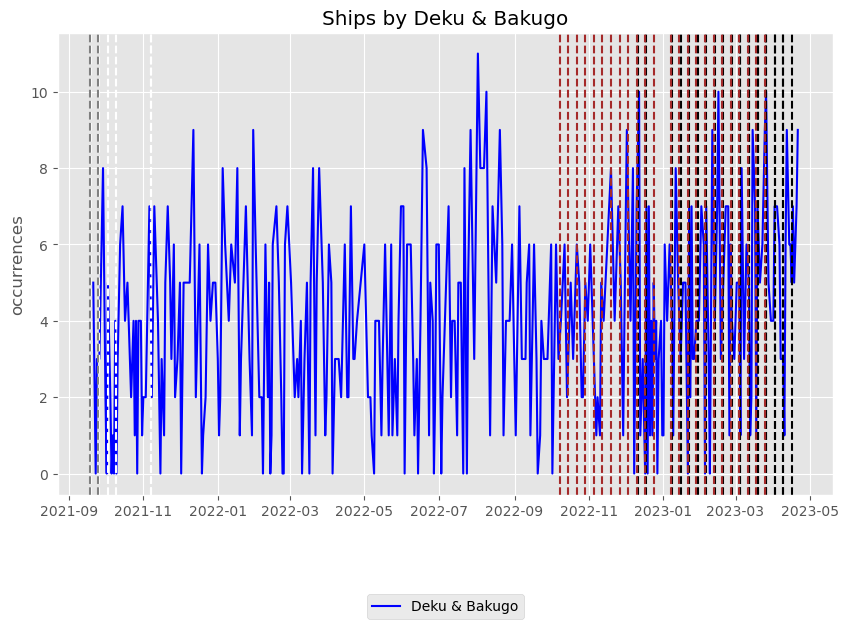

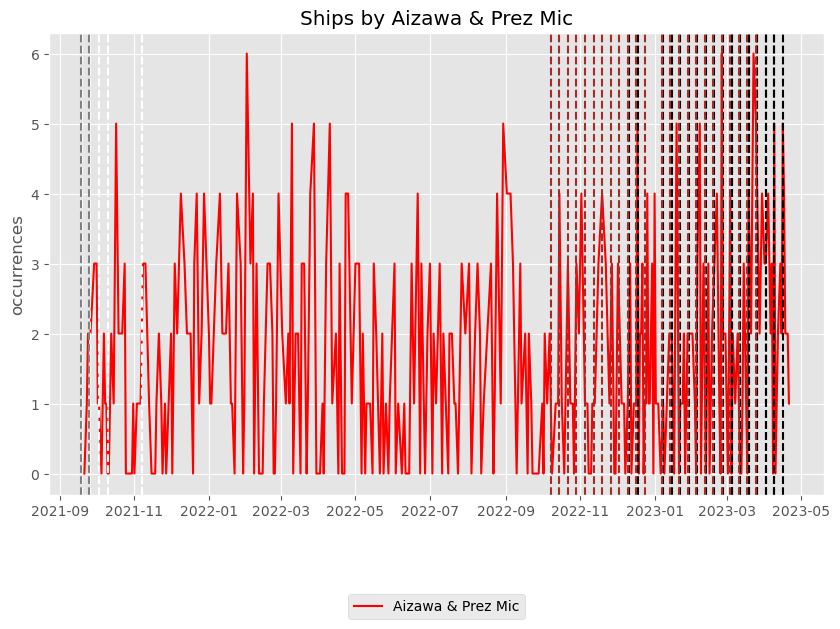

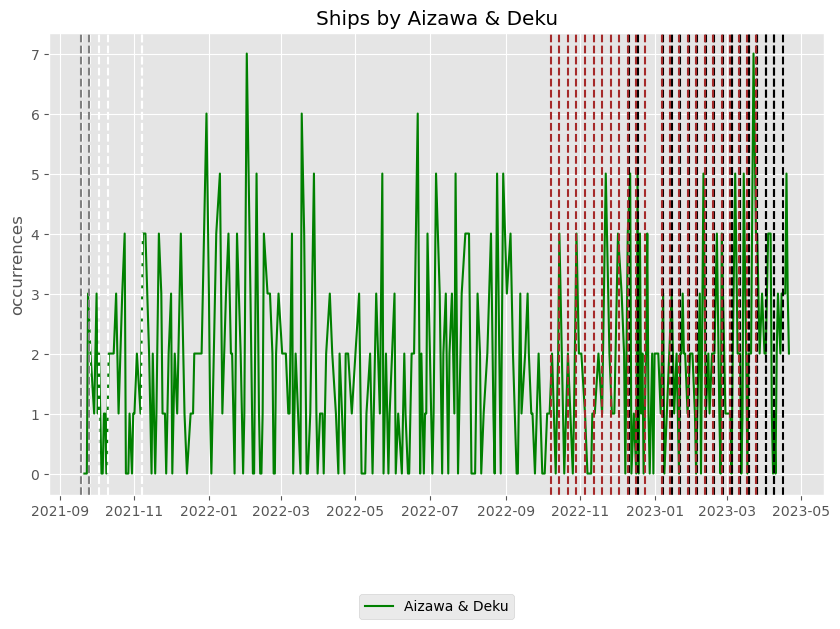

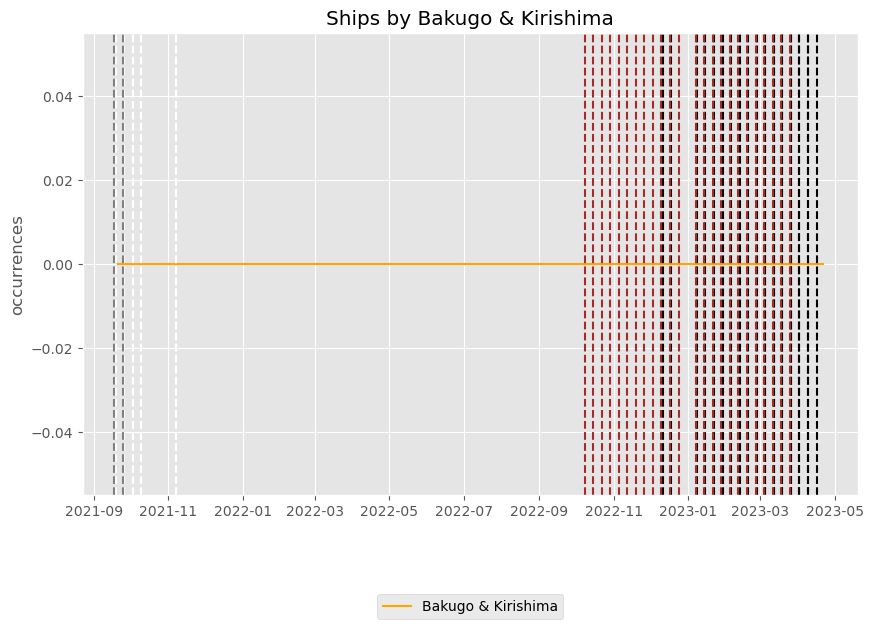

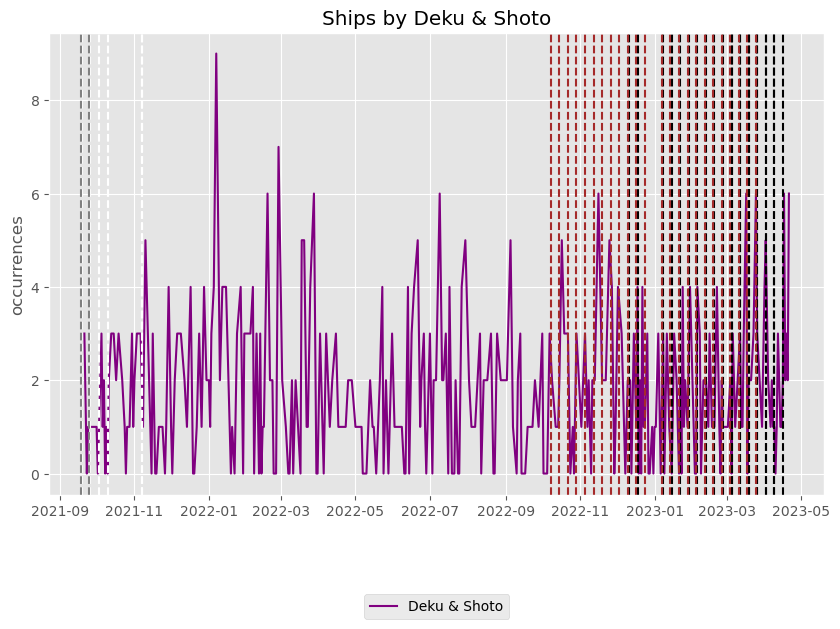

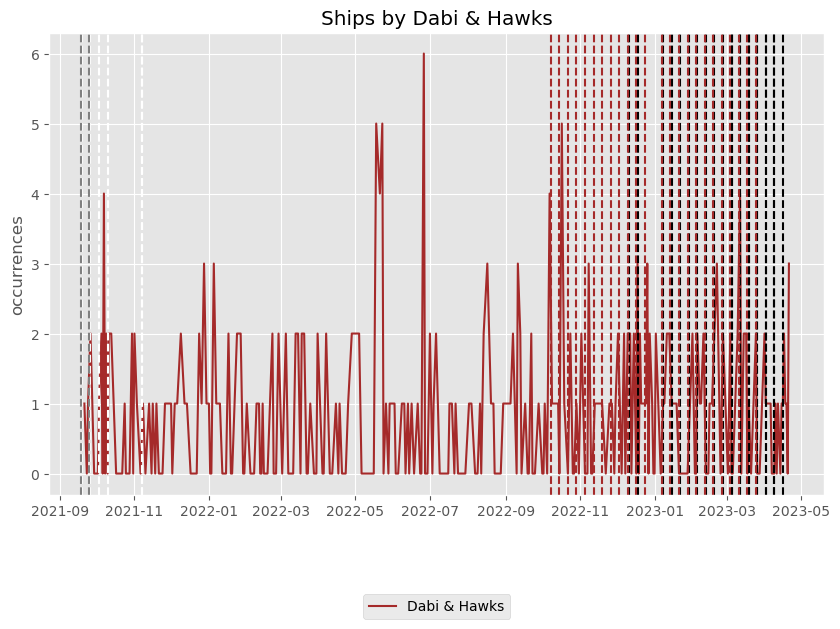

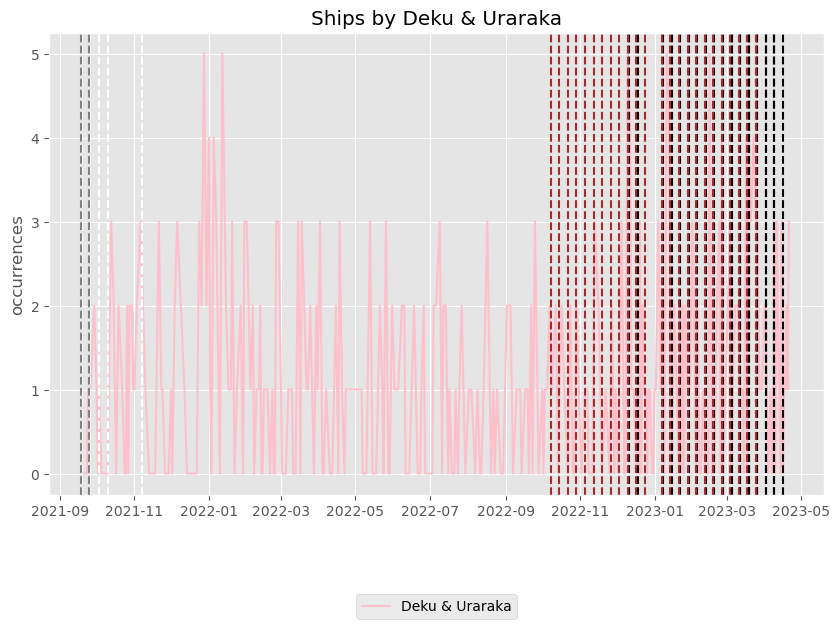

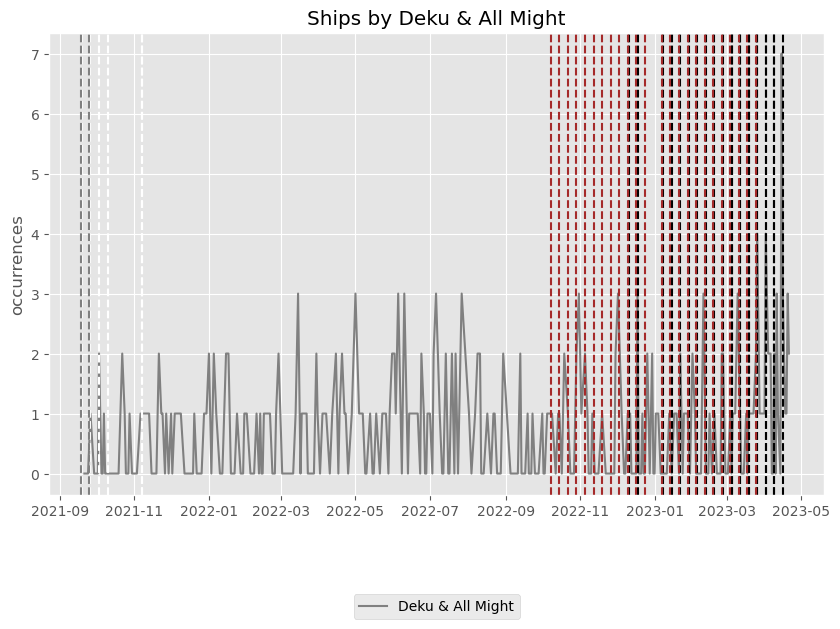

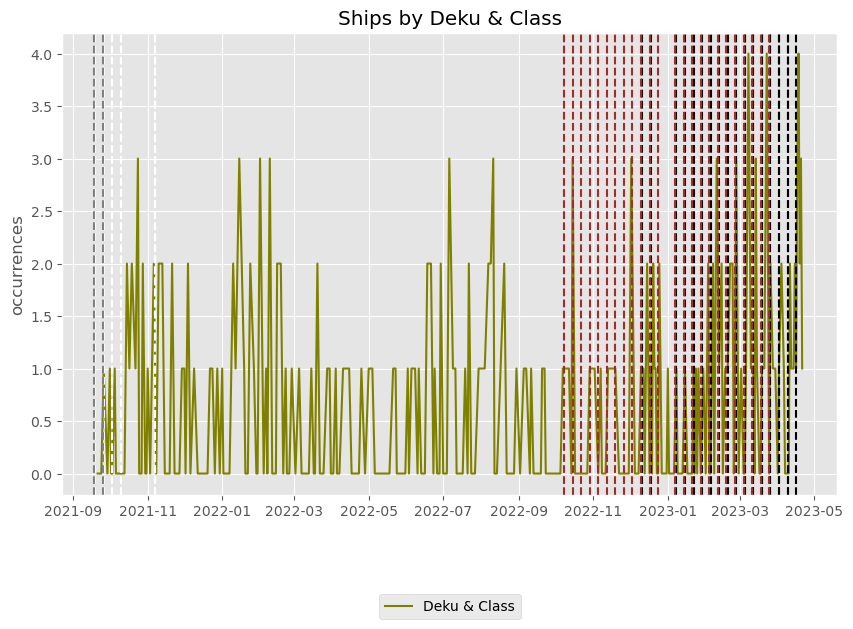

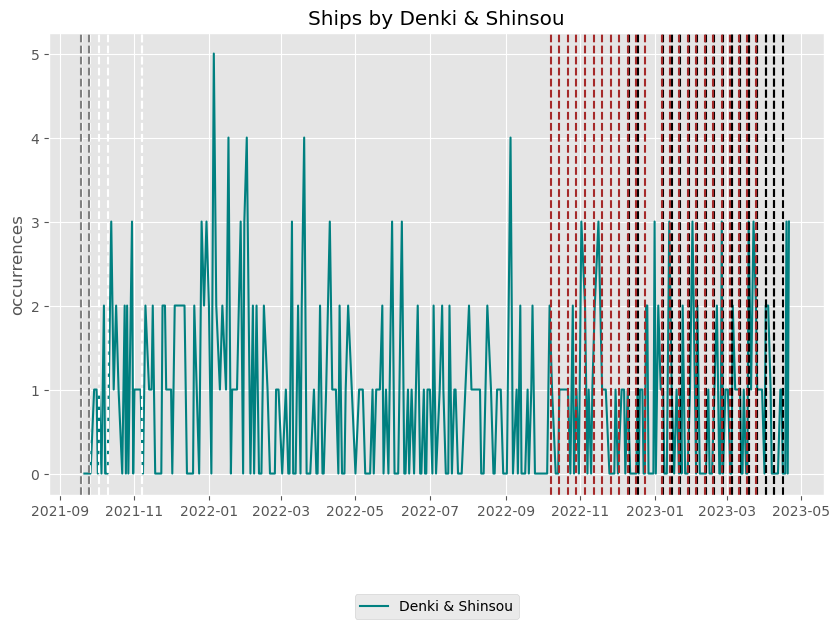

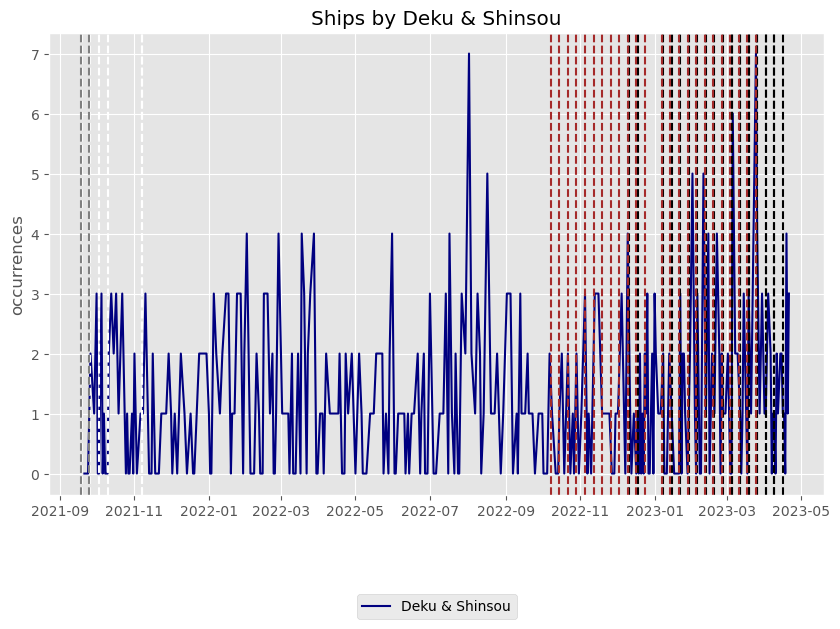

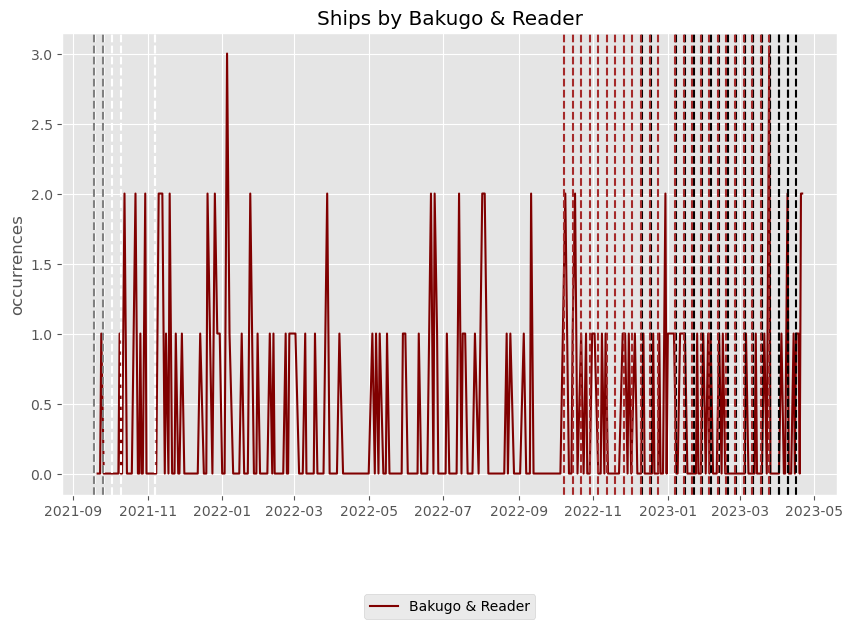

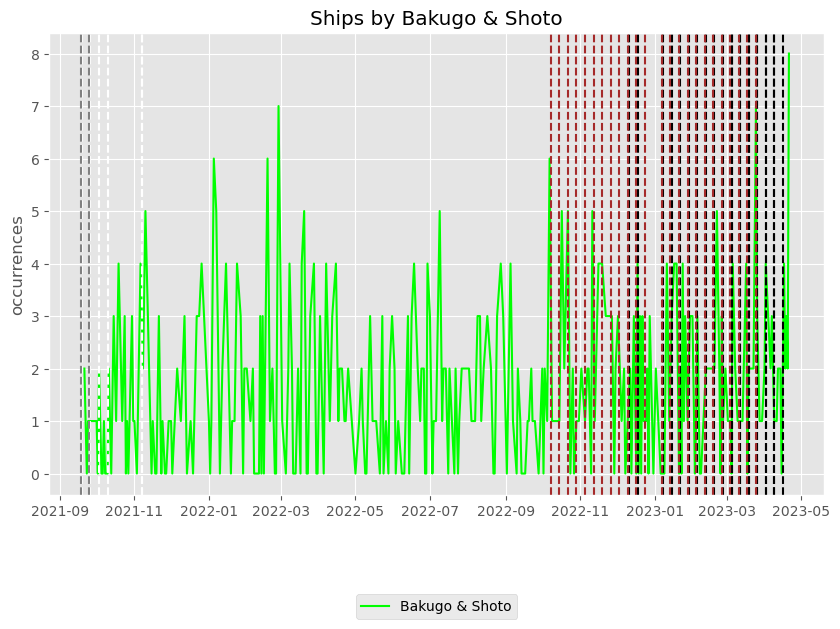

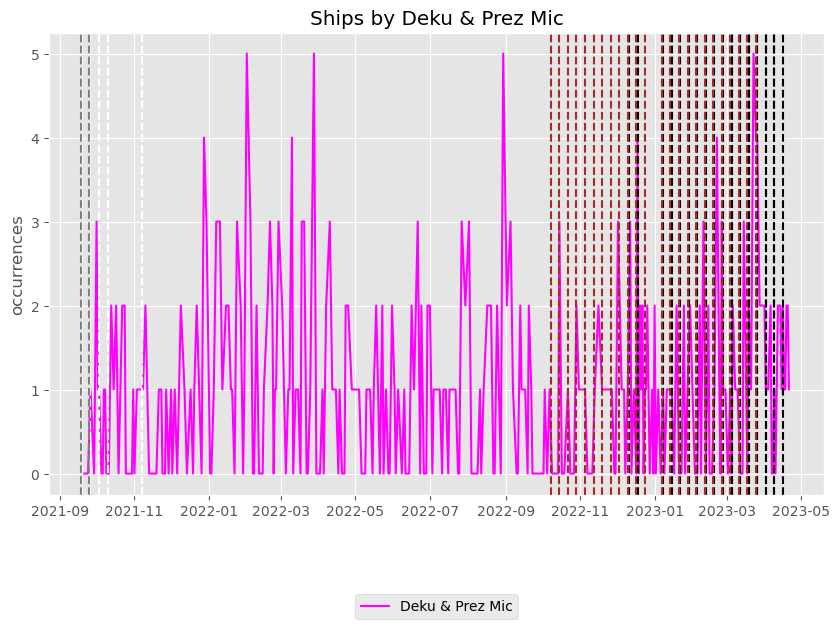

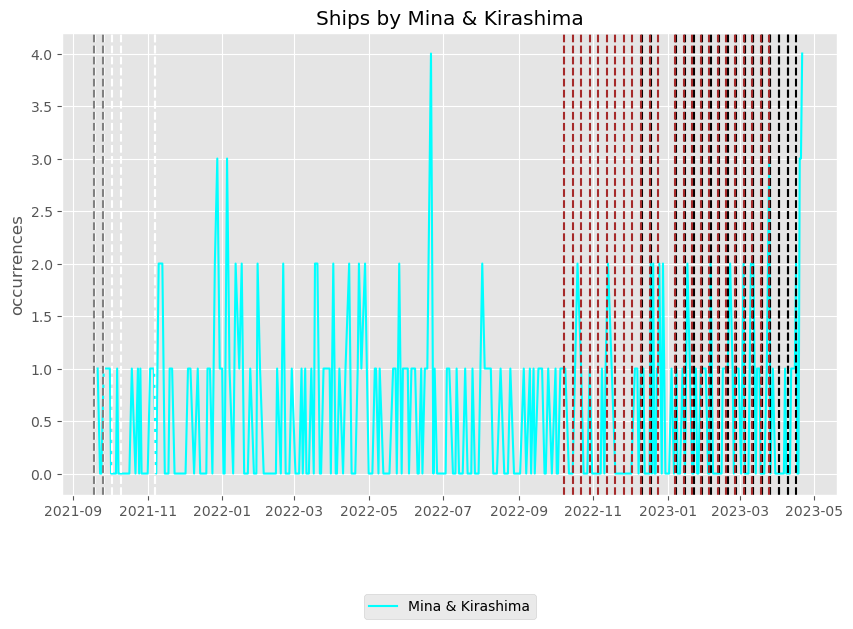

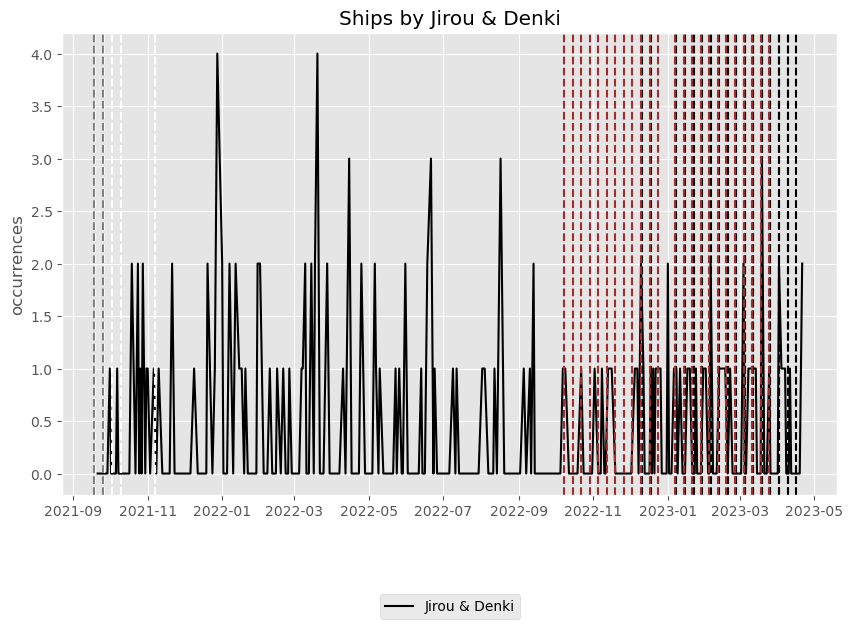

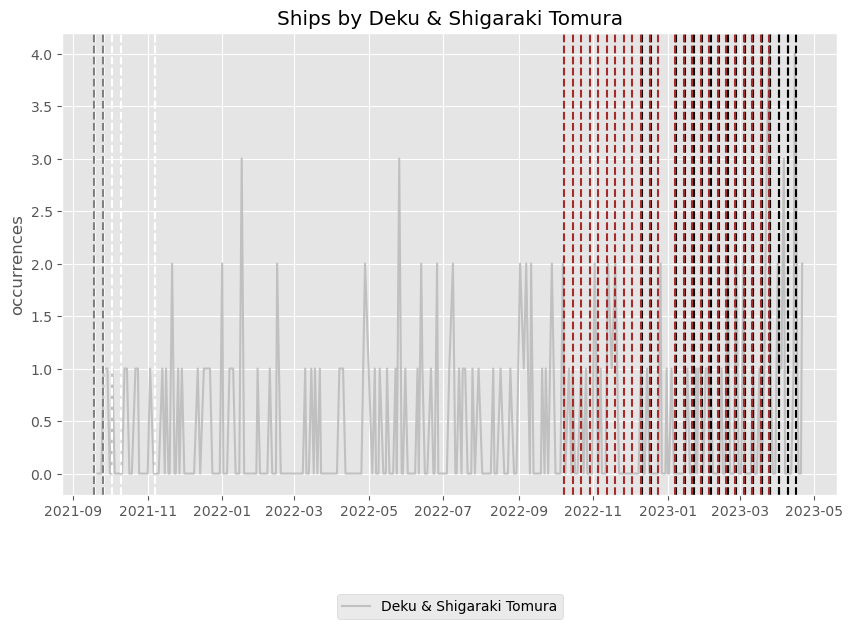

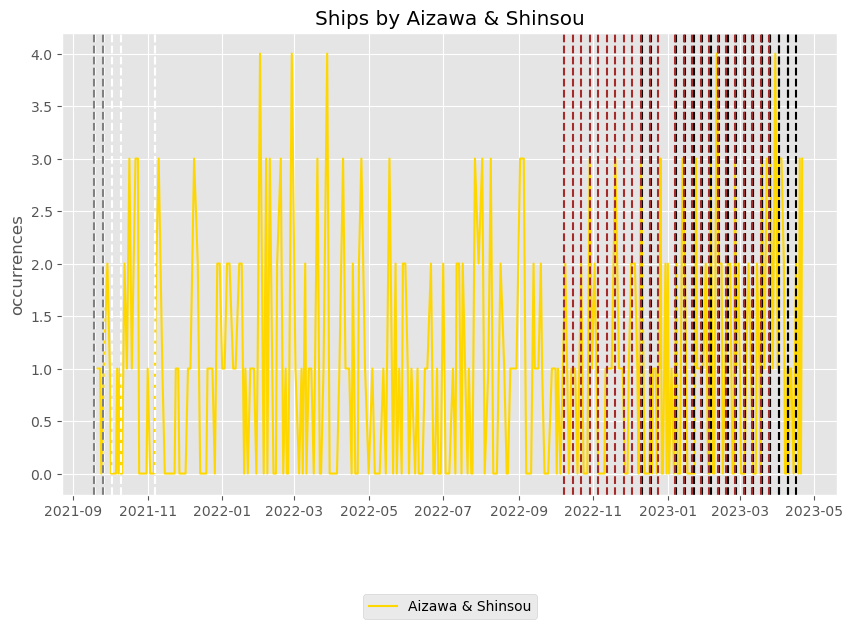

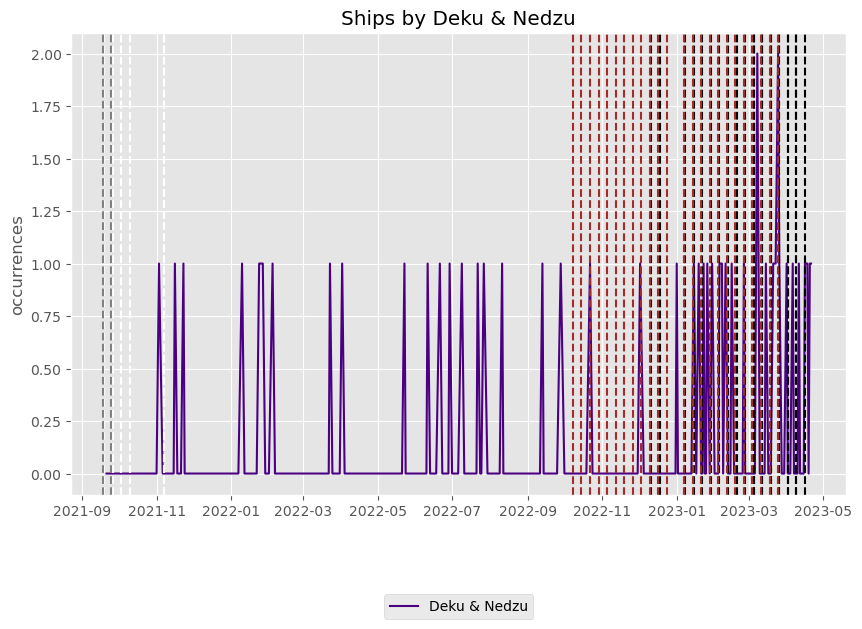

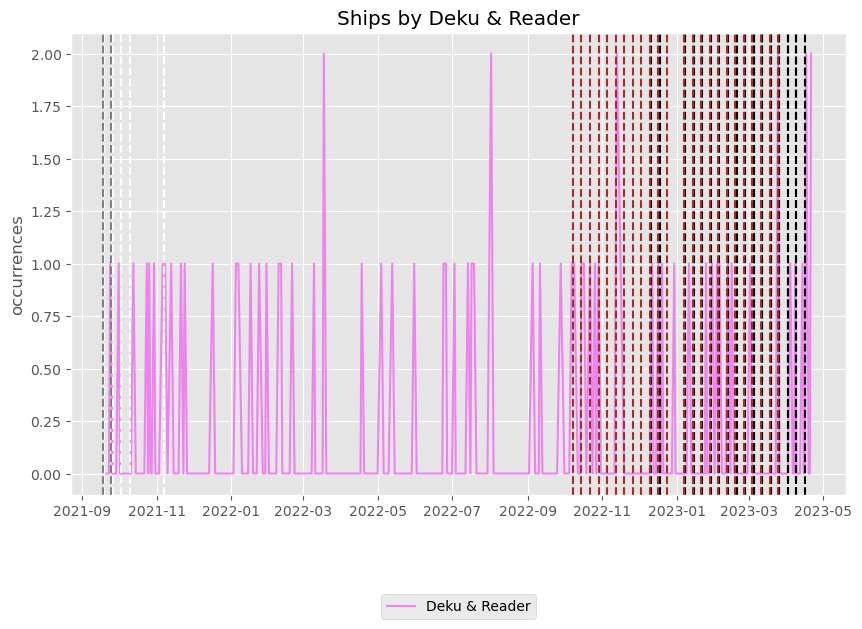

In [30]:
for col in ships_only.columns:
    plt.figure() # create a new figure for each plot
    plt.plot(ships_only[col], color=colors[ships_only.columns.get_loc(col)])
    plt.ylabel('occurrences')
    plt.title('Ships by ' + col)
    plt.legend([col], bbox_to_anchor=(0.5, -0.2), loc='upper center')
    for i in range(1, 24):
        plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
    for j in range(19, 25):
        plt.axvline(x=season_five_anime['English_Air_Date'][j], color='white', linestyle = '--')
    for i in range(1, 25):
        plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
    for j in range(23, 25):
        plt.axvline(x=season_five_anime['Original_Air_Date'][j], color='grey', linestyle = '--')
    plt.show()


In [31]:
char_in_ships = ships_dates_group.drop(columns = ['kudos', 'hits', 'sum kudos', 'sum hits', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader'])

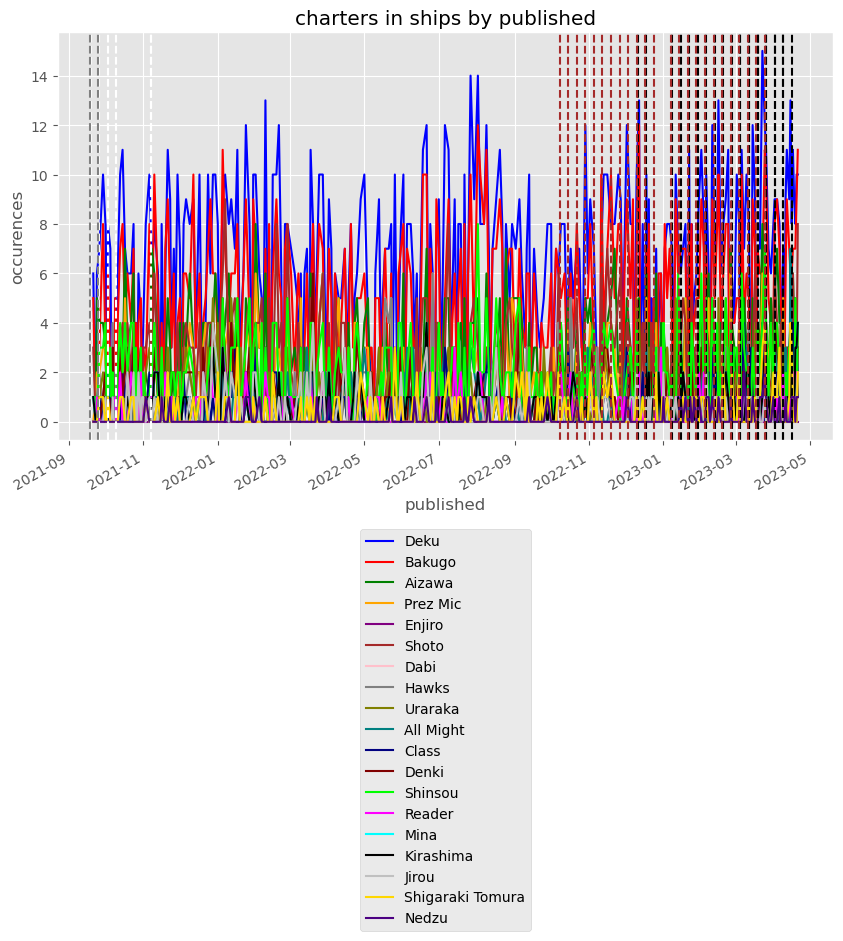

In [32]:
char_in_ships.plot(color = colors)
plt.ylabel('occurences')
plt.title('charters in ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
for j in range(19, 25):
    plt.axvline(x=season_five_anime['English_Air_Date'][j], color='white', linestyle = '--')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
for j in range(23, 25):
    plt.axvline(x=season_five_anime['Original_Air_Date'][j], color='grey', linestyle = '--')
plt.show()

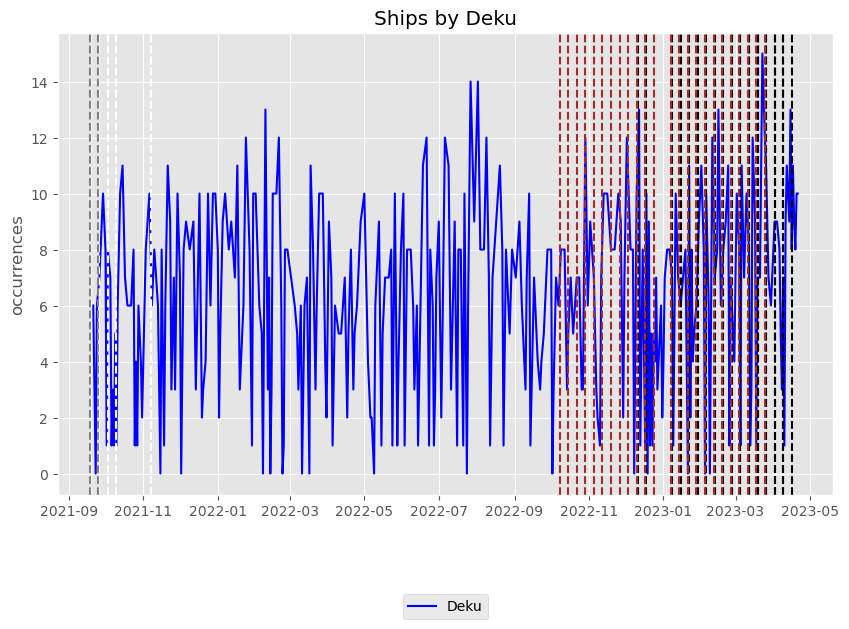

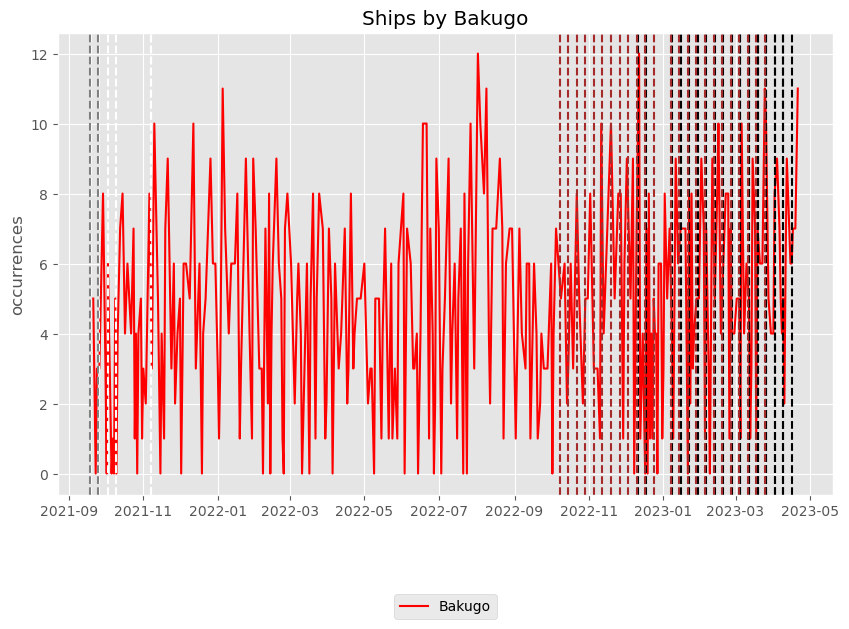

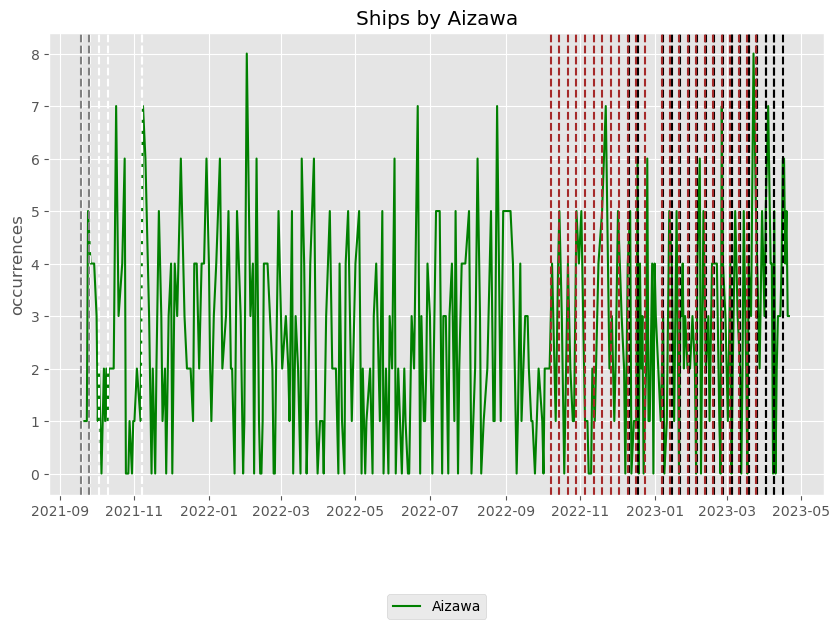

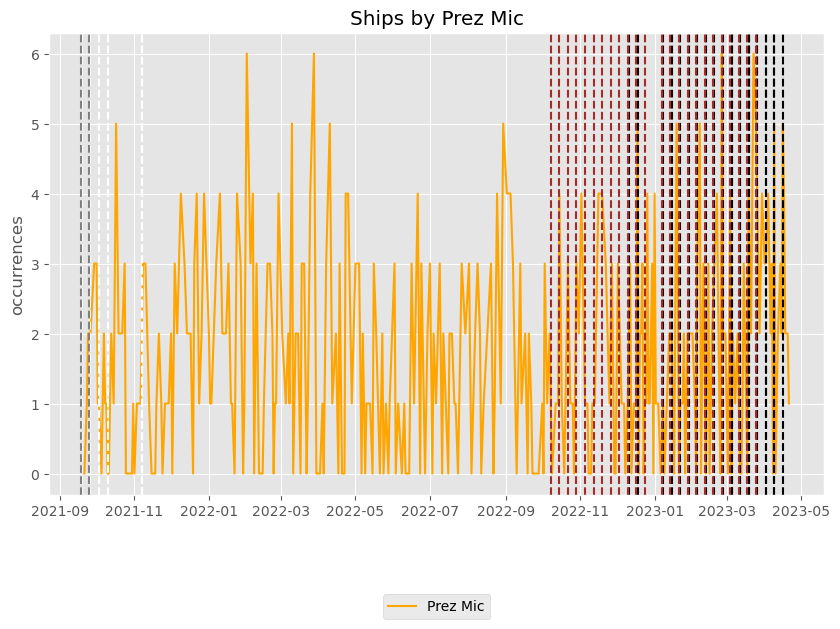

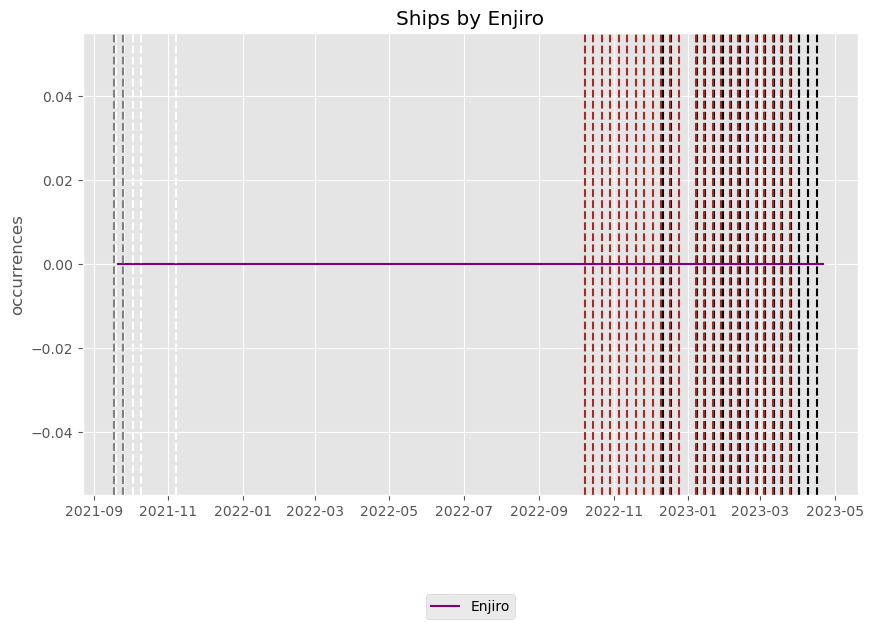

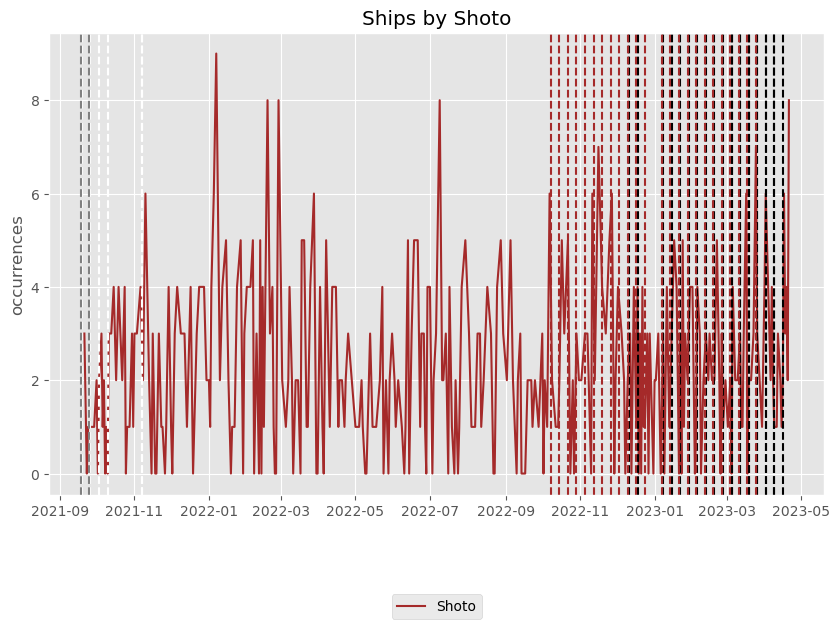

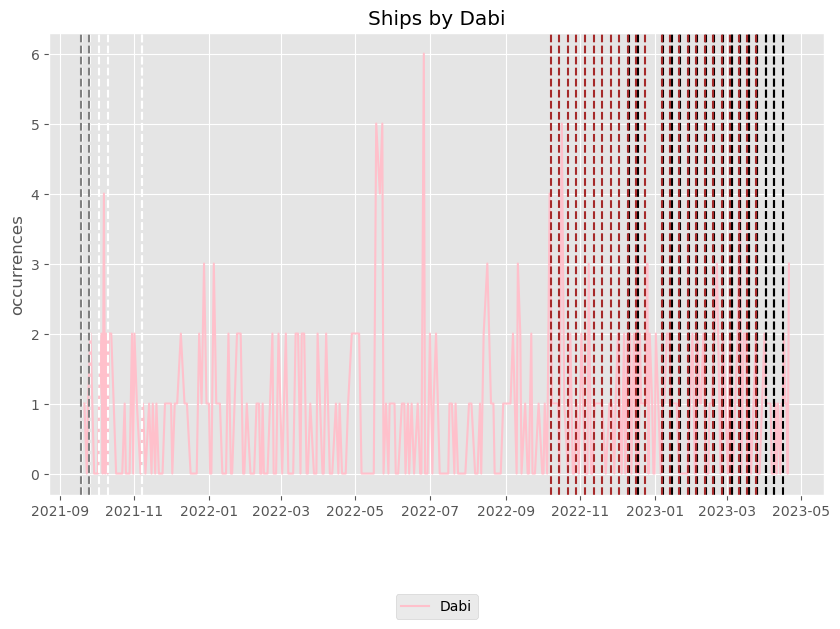

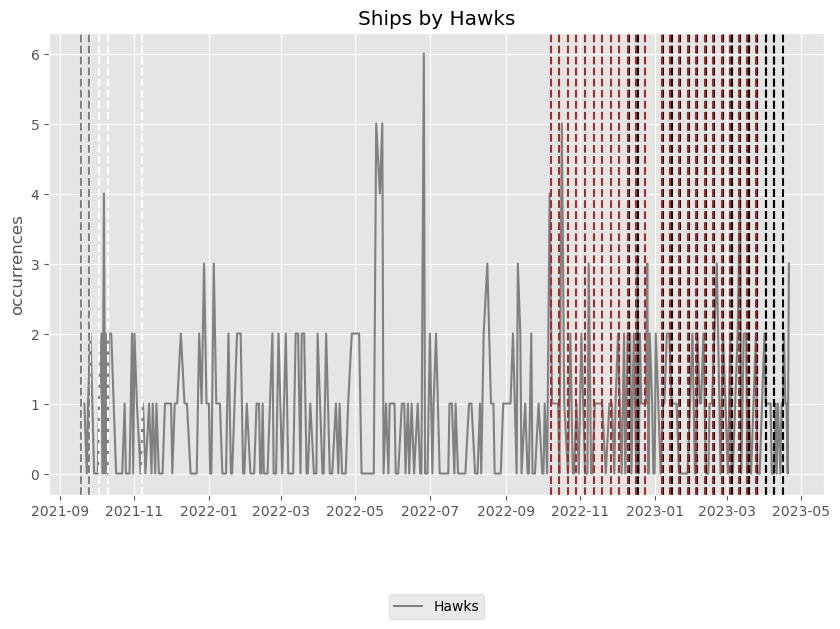

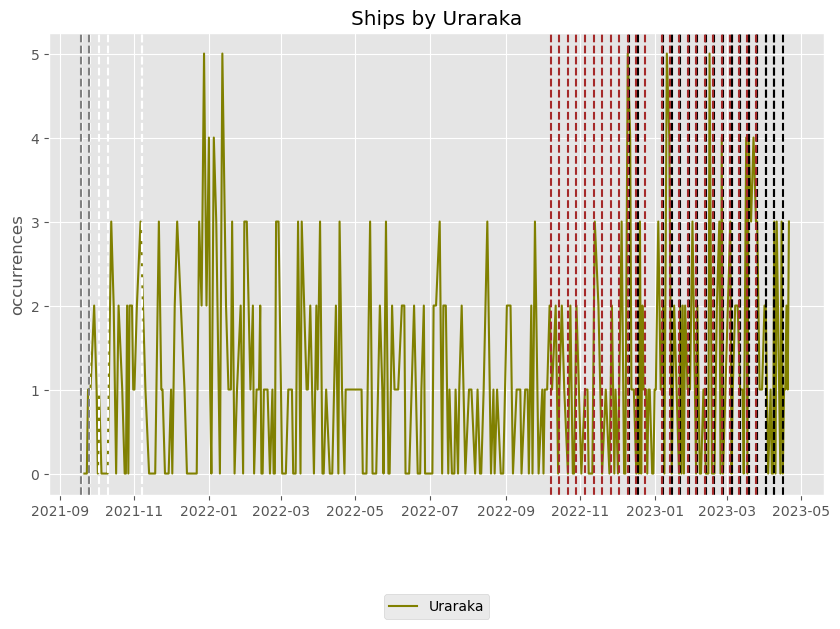

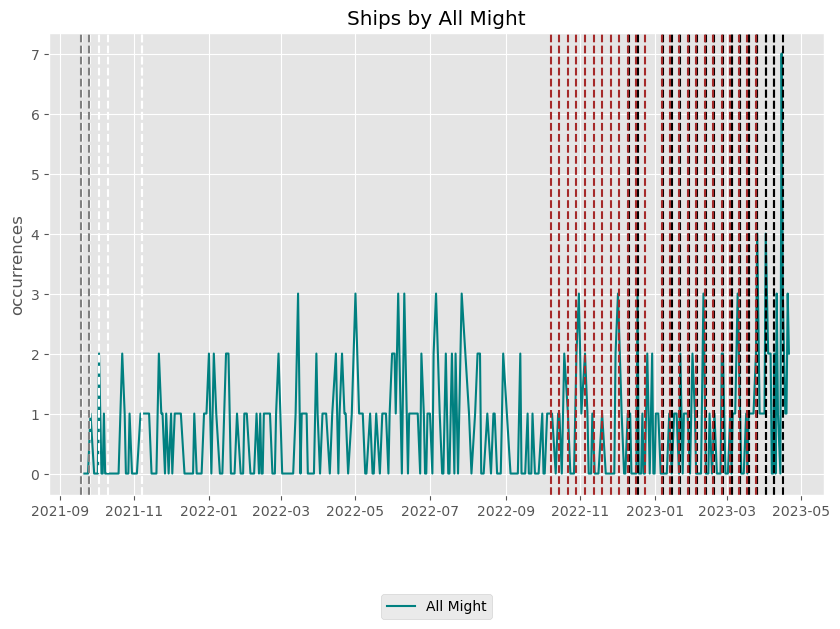

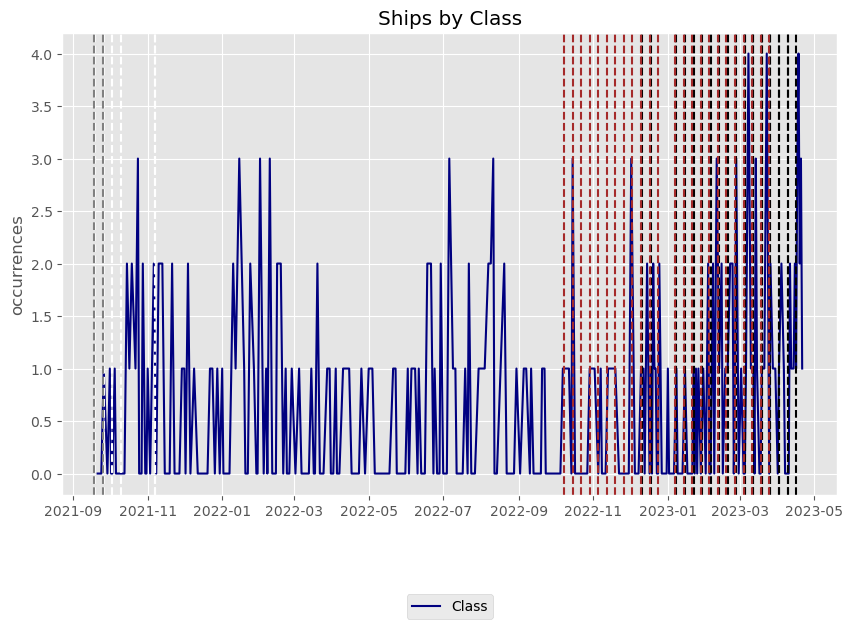

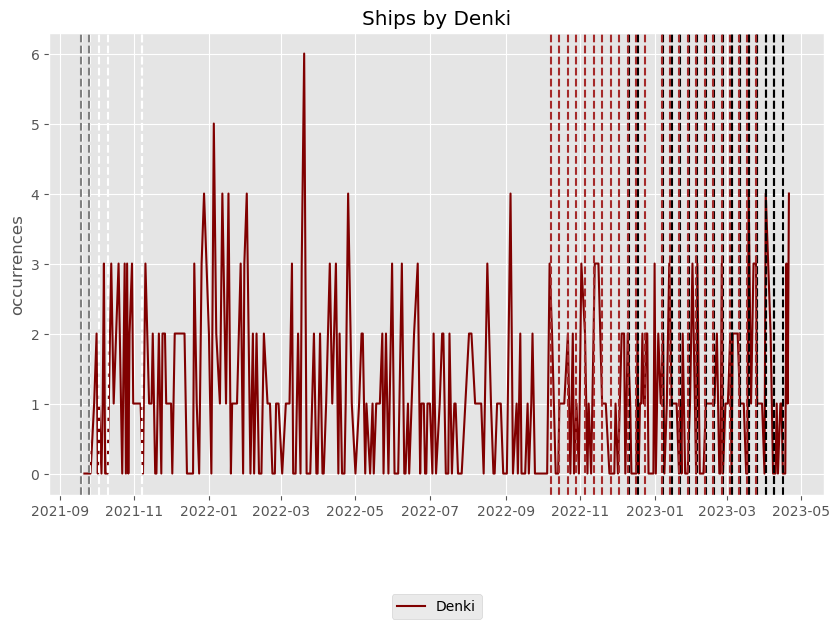

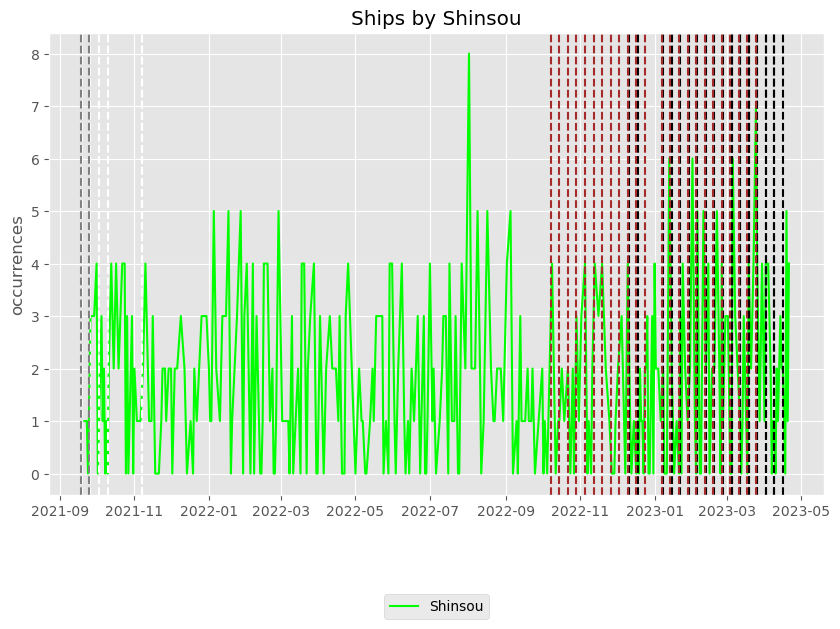

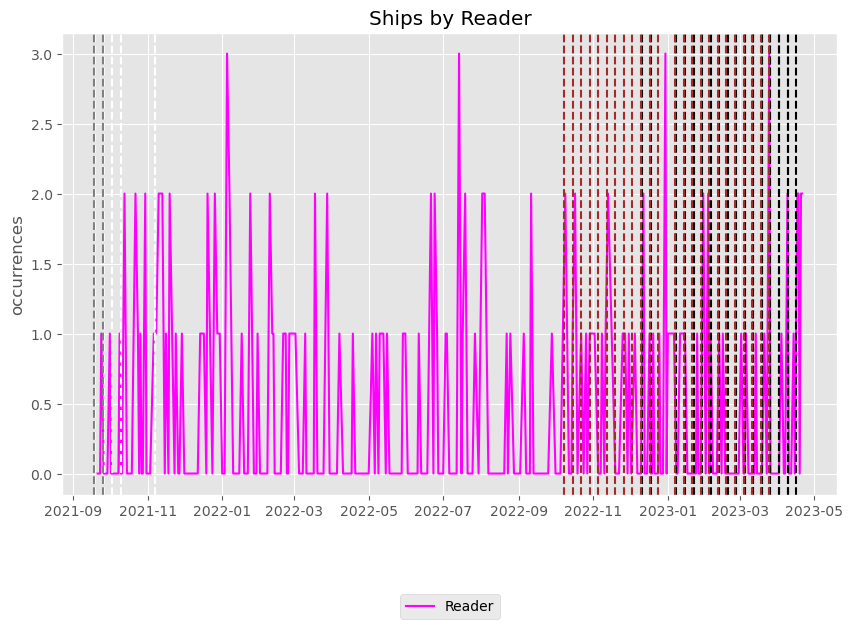

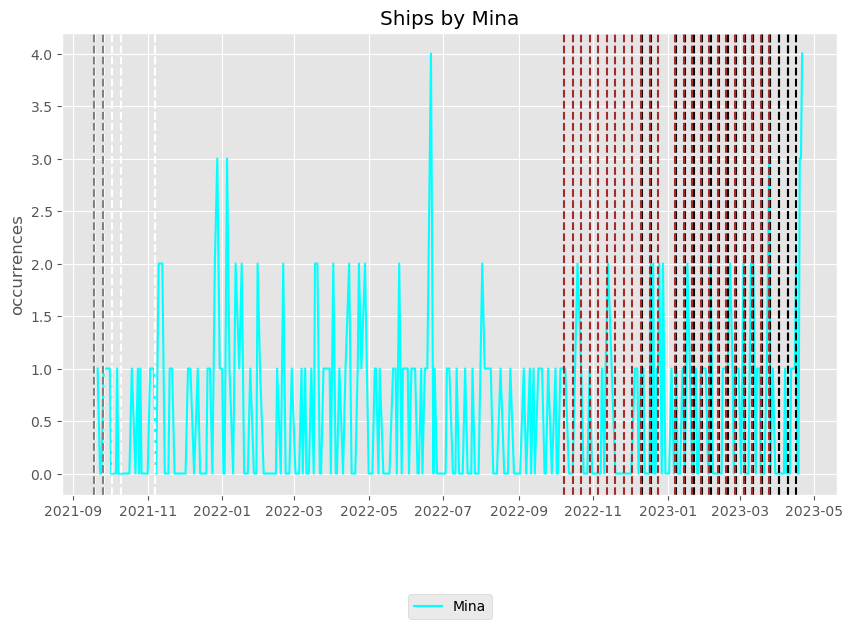

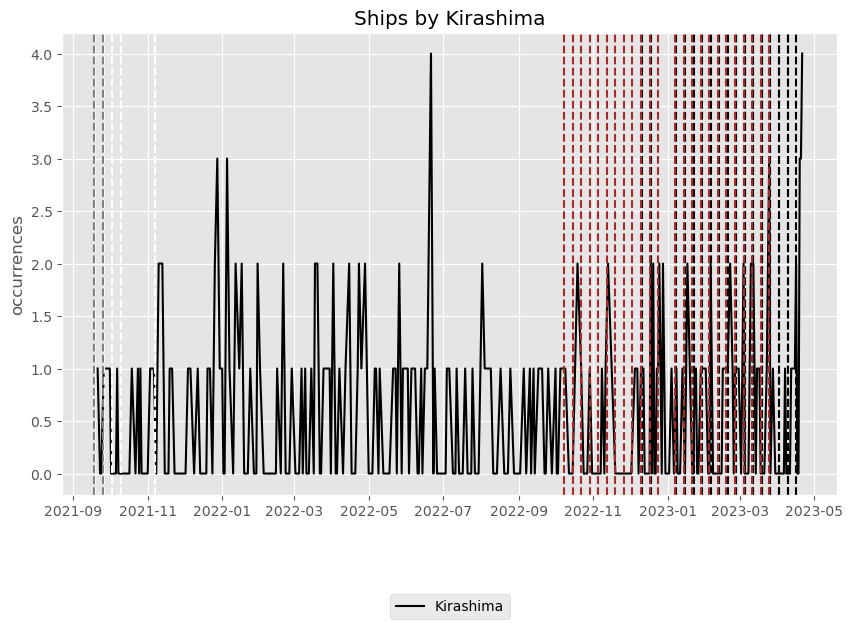

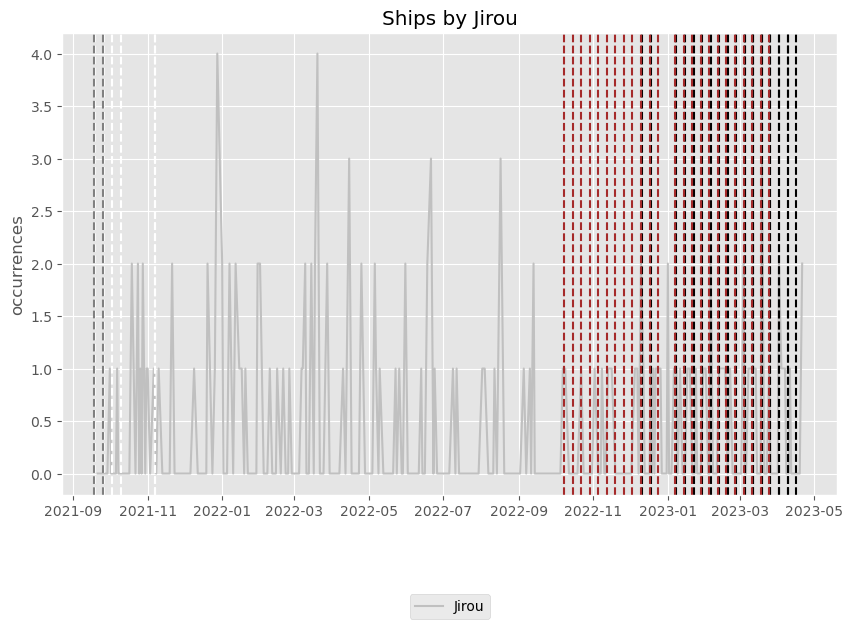

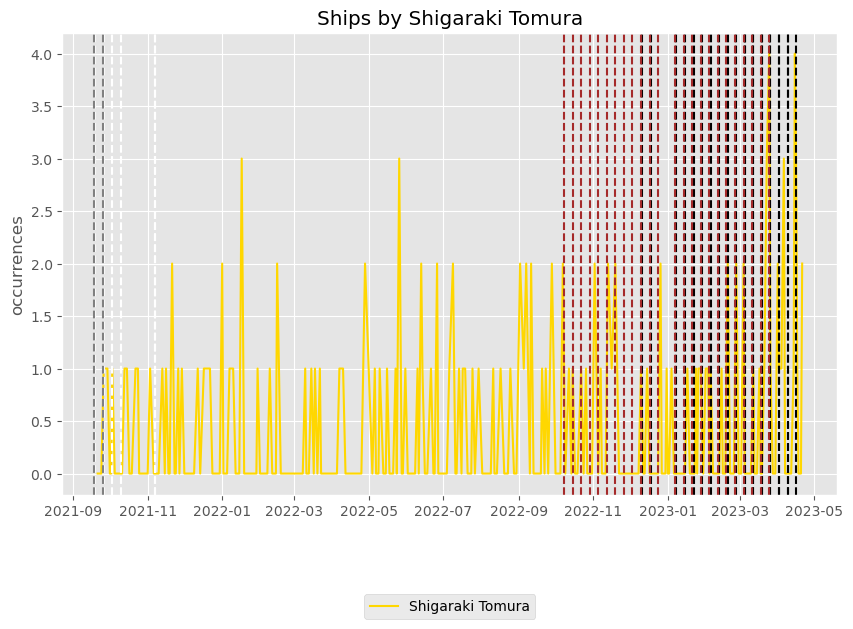

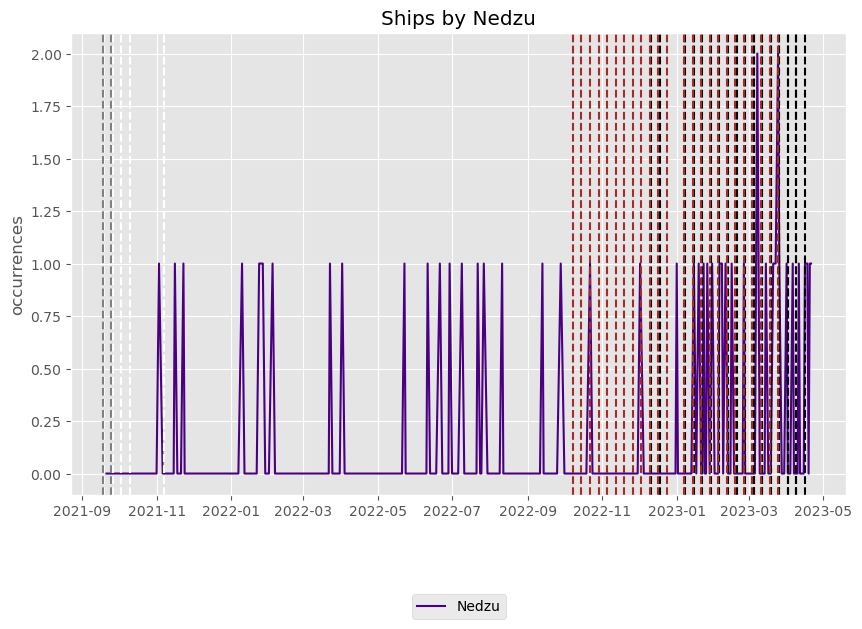

In [33]:

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']

for col in char_in_ships.columns:
    plt.figure() # create a new figure for each plot
    plt.plot(char_in_ships[col], color=colors[char_in_ships.columns.get_loc(col)])
    plt.ylabel('occurrences')
    plt.title('Ships by ' + col)
    plt.legend([col], bbox_to_anchor=(0.5, -0.2), loc='upper center')
    for i in range(1, 24):
        plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
    for j in range(19, 25):
        plt.axvline(x=season_five_anime['English_Air_Date'][j], color='white', linestyle = '--')
    for i in range(1, 25):
        plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
    for j in range(23, 25):
        plt.axvline(x=season_five_anime['Original_Air_Date'][j], color='grey', linestyle = '--')
    plt.show()


In [34]:
sum_hit = ships_dates_group.drop(columns = ['kudos', 'hits', 'sum kudos'])
hit = ships_dates_group.drop(columns = ['kudos', 'sum hits', 'sum kudos'])
sum_kudo = ships_dates_group.drop(columns = ['kudos', 'sum hits', 'hits'])
kudo = ships_dates_group.drop(columns = ['hits', 'sum hits', 'sum kudos'])

In [38]:
kudo_top_char_ols = sm.ols('kudos ~ Deku + Bakugo', data = kudo).fit()
display(kudo_top_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kudos   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.429
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.241
Time:                        18:23:32   Log-Likelihood:                -2403.3
No. Observations:                 328   AIC:                             4813.
Df Residuals:                     325   BIC:                             4824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    318.5731     42.430      7.508      0.000     235.102     402.044
Deku           8.5563     10.960      0.781      0.436     -13.006      30.119
Bakugo       -19.1647     13.083     -1.465      0.144     -44.902       6.573
==============================================================================
Omnibus:                      501.107   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97999.167
Skew:                           7.888   Prob(JB):                         0.00
Kurtosis:                      86.197   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
kudo_top_char_ols = sm.ols('Q("kudos") ~ Q("Deku & Bakugo")', data = kudo).fit()
display(kudo_top_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kudos   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.046
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.154
Time:                        18:15:23   Log-Likelihood:                -2403.7
No. Observations:                 328   AIC:                             4811.
Df Residuals:                     326   BIC:                             4819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            326.1207     37.803      8.627      0.000     251.751     400.490
Q("Deku & Bakugo")   -11.3364      7.925     -1.430      0.154     -26.927       4.255
==============================================================================
Omnibus:                      500.121   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97141.526
Skew:                           7.860   Prob(JB):                         0.00
Kurtosis:                      85.830   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sum_hit_char_ols = sm.ols('Q("sum hits") ~ Deku + Bakugo + Aizawa + Q("Prez Mic") + Enjiro + Shoto + Dabi + Hawks + Uraraka + Q("All Might") + Class + Denki + Shinsou + Reader + Mina + Kirashima + Jirou + Q("Shigaraki Tomura") + Nedzu', data = sum_hit).fit()
display(sum_hit_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("sum hits")   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     4.773
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.09e-08
Time:                        09:58:59   Log-Likelihood:                -4166.7
No. Observations:                 328   AIC:                             8367.
Df Residuals:                     311   BIC:                             8432.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8605.5103   9615.612      0.895      0.372   -1.03e+04    2.75e+04
Deku                   3718.2462   3151.786      1.180      0.239   -2483.274    9919.767
Bakugo                 2722.4368   3228.354      0.843      0.400   -3629.740    9074.614
Aizawa                 -537.4602   5272.918     -0.102      0.919   -1.09e+04    9837.645
Q("Prez Mic")          1.371e+04   6071.671      2.259      0.025    1767.956    2.57e+04
Enjiro                 4.945e-13   2.53e-12      0.195      0.845   -4.49e-12    5.48e-12
Shoto                 -5163.6296   3527.066     -1.464      0.144   -1.21e+04    1776.300
Dabi                   2893.7851   2428.132      1.192      0.234   -1883.858    7671.428
Hawks                  2893.7851   2428.132      1.192      0.234   -1883.858    7671.428
Uraraka                3261.5812   4918.664      0.663      0.508   -6416.487    1.29e+04
Q("All Might")         2178.4384   5711.229      0.381      0.703   -9059.097    1.34e+04
Class                  1487.0522   6281.974      0.237      0.813   -1.09e+04    1.38e+04
Denki                  1526.5333   7749.825      0.197      0.844   -1.37e+04    1.68e+04
Shinsou                1644.4740   4796.098      0.343      0.732   -7792.430    1.11e+04
Reader                 4370.4821   6987.636      0.625      0.532   -9378.539    1.81e+04
Mina                  -2344.3114   3779.543     -0.620      0.536   -9781.021    5092.398
Kirashima             -2344.3114   3779.543     -0.620      0.536   -9781.021    5092.398
Jirou                  2284.2915   9071.452      0.252      0.801   -1.56e+04    2.01e+04
Q("Shigaraki Tomura")  1650.4371   7049.104      0.234      0.815   -1.22e+04    1.55e+04
Nedzu                  1.481e+04   1.32e+04      1.123      0.262   -1.11e+04    4.08e+04
==============================================================================
Omnibus:                      277.744   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4931.966
Skew:                           3.513   Prob(JB):                         0.00
Kurtosis:                      20.650   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
hit_char_ols = sm.ols('hits ~ Deku + Bakugo + Aizawa + Q("Prez Mic") + Enjiro + Shoto + Dabi + Hawks + Uraraka + Q("All Might") + Class + Denki + Shinsou + Reader + Mina + Kirashima + Jirou + Q("Shigaraki Tomura") + Nedzu', data = hit).fit()
display(hit_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hits   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.360
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.160
Time:                        09:58:59   Log-Likelihood:                -3231.9
No. Observations:                 328   AIC:                             6498.
Df Residuals:                     311   BIC:                             6562.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3266.6354    556.149      5.874      0.000    2172.345    4360.926
Deku                     43.6731    182.293      0.240      0.811    -315.011     402.357
Bakugo                  -20.6050    186.722     -0.110      0.912    -388.003     346.793
Aizawa                 -155.7538    304.976     -0.511      0.610    -755.831     444.323
Q("Prez Mic")           774.9603    351.174      2.207      0.028      83.983    1465.938
Enjiro                 1.217e-13   1.46e-13      0.831      0.407   -1.66e-13     4.1e-13
Shoto                  -287.5037    203.999     -1.409      0.160    -688.896     113.889
Dabi                     48.8892    140.439      0.348      0.728    -227.441     325.219
Hawks                    48.8892    140.439      0.348      0.728    -227.441     325.219
Uraraka                 159.0869    284.486      0.559      0.576    -400.675     718.848
Q("All Might")          134.0872    330.327      0.406      0.685    -515.871     784.045
Class                   133.9823    363.338      0.369      0.713    -580.929     848.893
Denki                     5.8156    448.235      0.013      0.990    -876.142     887.773
Shinsou                 108.5575    277.397      0.391      0.696    -437.255     654.370
Reader                  239.6421    404.152      0.593      0.554    -555.576    1034.860
Mina                   -109.7025    218.602     -0.502      0.616    -539.828     320.423
Kirashima              -109.7025    218.602     -0.502      0.616    -539.828     320.423
Jirou                   177.3571    524.676      0.338      0.736    -855.006    1209.720
Q("Shigaraki Tomura")     6.8577    407.707      0.017      0.987    -795.355     809.071
Nedzu                  1008.0775    762.920      1.321      0.187    -493.061    2509.216
==============================================================================
Omnibus:                      246.984   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2859.113
Skew:                           3.140   Prob(JB):                         0.00
Kurtosis:                      16.030   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
sum_kudo_char_ols = sm.ols('Q("sum kudos") ~ Deku + Bakugo + Aizawa + Q("Prez Mic") + Enjiro + Shoto + Dabi + Hawks + Uraraka + Q("All Might") + Class + Denki + Shinsou + Reader + Mina + Kirashima + Jirou + Q("Shigaraki Tomura") + Nedzu', data = sum_kudo).fit()
display(sum_kudo_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q("sum kudos")   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     7.410
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.11e-14
Time:                        09:58:59   Log-Likelihood:                -3082.6
No. Observations:                 328   AIC:                             6199.
Df Residuals:                     311   BIC:                             6264.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               833.8682    352.777      2.364      0.019     139.736    1528.000
Deku                    402.1255    115.633      3.478      0.001     174.604     629.647
Bakugo                  -24.7274    118.442     -0.209      0.835    -257.776     208.321
Aizawa                  382.7084    193.453      1.978      0.049       2.067     763.350
Q("Prez Mic")           107.7017    222.757      0.483      0.629    -330.600     546.004
Enjiro                -4.457e-14   9.29e-14     -0.480      0.632   -2.27e-13    1.38e-13
Shoto                  -170.1747    129.401     -1.315      0.189    -424.787      84.437
Dabi                    203.5452     89.083      2.285      0.023      28.263     378.827
Hawks                   203.5452     89.083      2.285      0.023      28.263     378.827
Uraraka                  -4.2123    180.456     -0.023      0.981    -359.281     350.856
Q("All Might")         -245.0161    209.533     -1.169      0.243    -657.298     167.266
Class                  -184.7608    230.473     -0.802      0.423    -638.244     268.723
Denki                   122.9857    284.325      0.433      0.666    -436.459     682.430
Shinsou                 -27.4053    175.959     -0.156      0.876    -373.626     318.816
Reader                  150.2837    256.362      0.586      0.558    -354.140     654.707
Mina                    -88.7399    138.664     -0.640      0.523    -361.578     184.098
Kirashima               -88.7399    138.664     -0.640      0.523    -361.578     184.098
Jirou                   -37.6770    332.813     -0.113      0.910    -692.527     617.173
Q("Shigaraki Tomura")  -164.3794    258.617     -0.636      0.525    -673.240     344.481
Nedzu                  -116.2179    483.937     -0.240      0.810   -1068.422     835.986
==============================================================================
Omnibus:                      167.234   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.973
Skew:                           2.116   Prob(JB):                    2.10e-204
Kurtosis:                      10.122   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
kudo_char_ols = sm.ols('kudos ~ Deku + Bakugo + Aizawa + Q("Prez Mic") + Enjiro + Shoto + Dabi + Hawks + Uraraka + Q("All Might") + Class + Denki + Shinsou + Reader + Mina + Kirashima + Jirou + Q("Shigaraki Tomura") + Nedzu', data = kudo).fit()
display(kudo_char_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kudos   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.3380
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.993
Time:                        09:58:59   Log-Likelihood:                -2401.9
No. Observations:                 328   AIC:                             4838.
Df Residuals:                     311   BIC:                             4902.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               315.5485     44.277      7.127      0.000     228.428     402.669
Deku                      9.8800     14.513      0.681      0.497     -18.676      38.436
Bakugo                  -19.4653     14.866     -1.309      0.191     -48.715       9.785
Aizawa                   -2.6589     24.280     -0.110      0.913     -50.433      45.115
Q("Prez Mic")            25.4068     27.958      0.909      0.364     -29.604      80.418
Enjiro                 6.996e-15   1.17e-14      0.600      0.549   -1.59e-14    2.99e-14
Shoto                    -9.4903     16.241     -0.584      0.559     -41.447      22.466
Dabi                      1.4409     11.181      0.129      0.898     -20.559      23.441
Hawks                     1.4409     11.181      0.129      0.898     -20.559      23.441
Uraraka                  -6.3370     22.649     -0.280      0.780     -50.902      38.228
Q("All Might")           -8.5522     26.298     -0.325      0.745     -60.298      43.193
Class                    -1.7387     28.927     -0.060      0.952     -58.655      55.178
Denki                     1.5559     35.686      0.044      0.965     -68.660      71.772
Shinsou                  -3.4458     22.085     -0.156      0.876     -46.900      40.008
Reader                   11.3516     32.176      0.353      0.724     -51.958      74.662
Mina                     -0.8965     17.404     -0.052      0.959     -35.140      33.347
Kirashima                -0.8965     17.404     -0.052      0.959     -35.140      33.347
Jirou                    -1.7551     41.771     -0.042      0.967     -83.945      80.435
Q("Shigaraki Tomura")   -17.5711     32.459     -0.541      0.589     -81.438      46.296
Nedzu                    22.6839     60.739      0.373      0.709     -96.827     142.195
==============================================================================
Omnibus:                      504.427   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101941.239
Skew:                           7.976   Prob(JB):                         0.00
Kurtosis:                      87.880   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
og_season_anime_airdate

Season  Episodes First_Aired  Last_Aired
0       1        13  2016-04-03  2016-06-26
1       2        25  2017-04-01  2017-09-30
2       3        25  2018-04-07  2018-09-29
3       4        25  2019-10-12  2020-04-04
4       5        25  2021-03-27  2021-09-25
5       6        25  2022-10-01  2023-03-25

In [38]:
og_vid_animation_anime

No.                                              Title  \
0    1  "Save! Rescue Training!"Transcription: "Sukue!...   
1    2  "Training of the Dead"Transcription: "Torēning...   
2    3  "All Might: Rising"Transcription: "Ōru Maito: ...   
3    4  "Make It! Do-or-Die Survival Training, Part 1"...   
4    5  "Make It! Do-or-Die Survival Training, Part 2"...   
5    6  "Departure"Transcription: "Tabidachi" (Japanes...   
6    7  "HLB <Hero League Baseball>"Transcription: "Hī...   
7    8  "Laugh! As If You Are in Hell"Transcription: "...   

                     Storyboard by       Directed by     Written by  \
0                 Katsuyuki Kodera  Satoshi Takafuji  Yōsuke Kuroda   
1                  Shinji Ishihira        Ikurō Satō  Yōsuke Kuroda   
2                   Kenji Nagasaki    Kenji Nagasaki  Yōsuke Kuroda   
3                  Shinji Ishihira       Shōji Ikeno  Yōsuke Kuroda   
4                  Shinji Ishihira        Ikurō Satō  Yōsuke Kuroda   
5                   Kenji Nagasaki    Kenji Nagasaki  Yōsuke Kuroda   
6  Shinji Satō & Tomohiro Kamitani        Ikurō Satō  Yōsuke Kuroda   
7                      Masashi Abe       Masashi Abe  Yōsuke Kuroda   

  Original_Release_Date  
0            2016-11-27  
1            2017-06-02  
2            2019-02-13  
3            2020-08-16  
4            2020-08-16  
5            2022-02-16  
6            2022-06-16  
7            2022-06-16

In [39]:
funimation_crunchyroll_anime

Season                 Volume Episodes Release_Date
0   Season_1             Season One     1–13   2017-04-18
1   Season_2    Season Two Part One  13.5–25   2018-04-03
2   Season_2    Season Two Part Two    26–38   2018-06-05
3   Season_2    Season Two Complete  13.5–38   2020-09-17
4   Season_3  Season Three Part One    39–50   2019-05-07
5   Season_3  Season Three Part Two    51–63   2019-09-03
6   Season_3  Season Three Complete    39–63   2020-11-10
7   Season_4        Season 4 Part 1    64–76   2020-09-29
8   Season_4        Season 4 Part 2    77–88   2021-02-16
9   Season_4      Season 4 Complete    64–88   2022-02-15
10  Season_5        Season 5 Part 1   89–101   2022-03-29
11  Season_5        Season 5 Part 2  102–113   2022-12-19

In [40]:
universalpictures_manga_anime

Season                        Volume Episodes Release_Date
0  Season_1  Season One (Limited Edition)     1–13   2017-05-15
1  Season_1                    Season One     1–13   2019-06-10
2  Season_2           Season Two Part One  13.5–25   2018-04-02
3  Season_2           Season Two Part Two    26–38   2018-06-11
4  Season_2             Complete Season 2  13.5–38   2020-09-21
5  Season_3         Season Three Part One    39–50   2019-05-13
6  Season_3         Season Three Part Two    51–63   2019-09-09

In [41]:
universalsony_madman_anime

Season                                 Volume Episodes  \
0   Season_1           Season One (Limited Edition)     1–13   
1   Season_1                             Season One     1–13   
2   Season_2  Season Two Part One (Limited Edition)  13.5–25   
3   Season_2  Season Two Part Two (Limited Edition)    26–38   
4   Season_2                    Season Two Part One  13.5–25   
5   Season_2                    Season Two Part Two    26–38   
6   Season_3                        Season 3 Part 1    39–50   
7   Season_3                        Season 3 Part 2    51–63   
8   Season_4                        Season 4 Part 1    64–76   
9   Season_4                        Season 4 Part 2    77–88   
10  Season_5                        Season 5 Part 1   89–101   
11  Season_5                        Season 5 Part 2  102–113   

   Release_Date_Universal Release_Date_Madman  
0              2017-05-17                 NaN  
1              2018-08-15          2019-12-04  
2              2018-05-09                 NaN  
3              2018-06-13                 NaN  
4              2018-08-15          2019-12-04  
5              2018-08-15          2019-12-04  
6              2019-08-07                 NaN  
7              2019-11-06                 NaN  
8              2020-12-09                 NaN  
9              2021-04-21                 NaN  
10             2022-05-25                 NaN  
11             2023-02-08                 NaN

In [74]:
manga

No.                                              Title  \
0     1  Izuku Midoriya: OriginMidoriya Izuku: Orijin (...   
1     2     Rage, You Damned NerdTakere Kusonādo (猛れクソナード)   
2     3                         All MightŌrumaito (オールマイト)   
3     4  The Boy Born With EverythingSubete wo Motte Um...   
4     5  Shoto Todoroki: OriginTodoroki Shōto: Origin (...   
5     6                             StrugglingUgomeku (蠢く)   
6     7  Katsuki Bakugo: OriginBakugō Katsuki: Origin (...   
7     8    Yaoyorozu RisingYaoyorozu: Raijingu (八百万：ライジング)   
8     9                       My HeroBoku no Hīrō (僕のヒーロー)   
9    10                 All For OneŌru Fō Wan (オール・フォー・ワン)   
10   11  End of the Beginning, Beginning of the EndHaji...   
11   12                         The TestZa Shiken (THE 試験)   
12   13  A Talk About Your QuirkTemee no "Kosei" no Han...   
13   14                          OverhaulŌbāhōru (オーバーホール)   
14   15                   Fighting FateAragau Unmei (抗う運命)   
15   16  Red RiotReddo Raiotto (.mw-parser-output .temp...   
16   17                          LemillionRumirion (ルミリオン)   
17   18                  Bright FutureAkarui Mirai (明るい将来)   
18   19                      School FestivalBunkasai (文化祭)   
19   20  School Festival Start!!Kaisai Bunkasai!! (開催文化...   
20   21  Why He Gets Back UpKare wa Naze Tachi Tsuzuket...   
21   22      That Which is InheritedUketsugu Mono (受け継ぐモノ)   
22   23             Our BrawlBokura no Dairansen (ぼくらの大乱戦)   
23   24                        All It Takes Is One Bad Day   
24   25  Tomura Shigaraki: OriginShigaraki Tomura: Orij...   
25   26  The High, Deep Blue SkySora, Takaku Gunjō (空、高...   
26   27           One's JusticeWanzu Jasutisu (ワンズ ジャスティス)   
27   28  The Thrill of DestructionHametsu no Borutēji (...   
28   29  Katsuki Bakugo RisingBakugō Katsuki: Raijingu ...   
29   30                     Dabi's DanceDabi Dansu (ダビダンス)   
30   31  Izuku Midoriya and Toshinori YagiMidoriya Izuk...   
31   32           Your TurnZa Nekusuto (THE(ザ) NEXT(ネクスト))   
32   33  From Class A to One For AllĒ-Gumi kara Wan Fō ...   
33   34             United States of AmericaAmerika (アメリカ)   
34   35                                       Battle Flame   
35   36         Two FlashfiresFutatsu no Kakushaku (二つの赫灼)   
36   37  Those Who Defend, Those Who ViolateFusegu Mono...   

   Original_Release_Date English_Release_Date  
0             2014-11-04           2015-08-04  
1             2015-01-05           2015-11-03  
2             2015-04-03           2016-02-02  
3             2015-06-04           2016-05-03  
4             2015-08-04           2016-08-02  
5             2015-11-04           2016-11-01  
6             2016-02-04           2017-02-07  
7             2016-04-04           2017-05-02  
8             2016-06-03           2017-08-01  
9             2016-09-02           2017-11-07  
10            2016-11-04           2018-02-06  
11            2017-02-03           2018-04-03  
12            2017-04-04           2018-06-05  
13            2017-06-02           2018-08-07  
14            2017-09-04           2018-10-02  
15            2017-11-02           2018-12-04  
16            2018-02-02           2019-02-05  
17            2018-04-04           2019-04-02  
18            2018-07-04           2019-06-04  
19            2018-09-04           2019-08-06  
20            2018-12-04           2019-10-01  
21            2019-02-04           2019-12-03  
22            2019-05-02           2020-02-04  
23            2019-08-02           2020-06-02  
24            2019-12-04           2020-10-06  
25            2020-03-04           2021-01-05  
26            2020-07-03           2021-04-06  
27            2020-09-04           2021-06-01  
28            2021-01-04           2021-09-07  
29            2021-04-02           2022-03-01  
30            2021-08-04           2022-07-05  
31            2021-10-04           2022-10-04  
32            2022-02-04           2023-02-07  
33            2

In [50]:
season_six_ships_only = ships_only['2022-09-21':]

In [49]:
ships_only

Deku  Bakugo  Aizawa  Prez Mic  Enjiro  Shoto  Dabi  Hawks  \
published                                                                
2021-09-21     6       5       1         0       0      3     1      1   
2021-09-23     0       0       1         1       0      0     0      0   
2021-09-24     6       3       5         2       0      1     1      1   
2021-09-26     7       3       4         2       0      1     2      2   
2021-09-29    10       8       4         3       0      1     0      0   
...          ...     ...     ...       ...     ...    ...   ...    ...   
2023-04-17    11       7       6         4       0      6     2      2   
2023-04-18     9       7       4         2       0      3     1      1   
2023-04-19     8       7       5         2       0      4     1      1   
2023-04-20    10       9       3         2       0      2     0      0   
2023-04-21    10      11       3         1       0      8     3      3   

            Uraraka  All Might  Class  Denki  Shinsou  Reader  Mina  \
published                                                             
2021-09-21        0          0      0      0        1       0     1   
2021-09-23        0          0      0      0        1       0     0   
2021-09-24        1          0      0      0        0       1     0   
2021-09-26        1          1      1      0        3       0     1   
2021-09-29        2          0      0      1        3       0     1   
...             ...        ...    ...    ...      ...     ...   ...   
2023-04-17        1          2      3      0        1       2     0   
2023-04-18        1          1      4      0        0       2     0   
2023-04-19        2          1      2      3        5       0     3   
2023-04-20        1          3      3      1        1       2     3   
2023-04-21        3          2      1      4        4       2     4   

            Kirashima  Jirou  Shigaraki Tomura  Nedzu  
published                                              
2021-09-21          1      0                 0      0  
2021-09-23          0      0                 0      0  
2021-09-24          0      0                 0      0  
2021-09-26          1      0                 1      0  
2021-09-29          1      0                 1      0  
...               ...    ...               ...    ...  
2023-04-17          0      0                 1      1  
2023-04-18          0      0                 0      1  
2023-04-19          3      0                 0      0  
2023-04-20          3      1                 0      1  
2023-04-21          4      2                 2      1  

[328 rows x 19 columns]

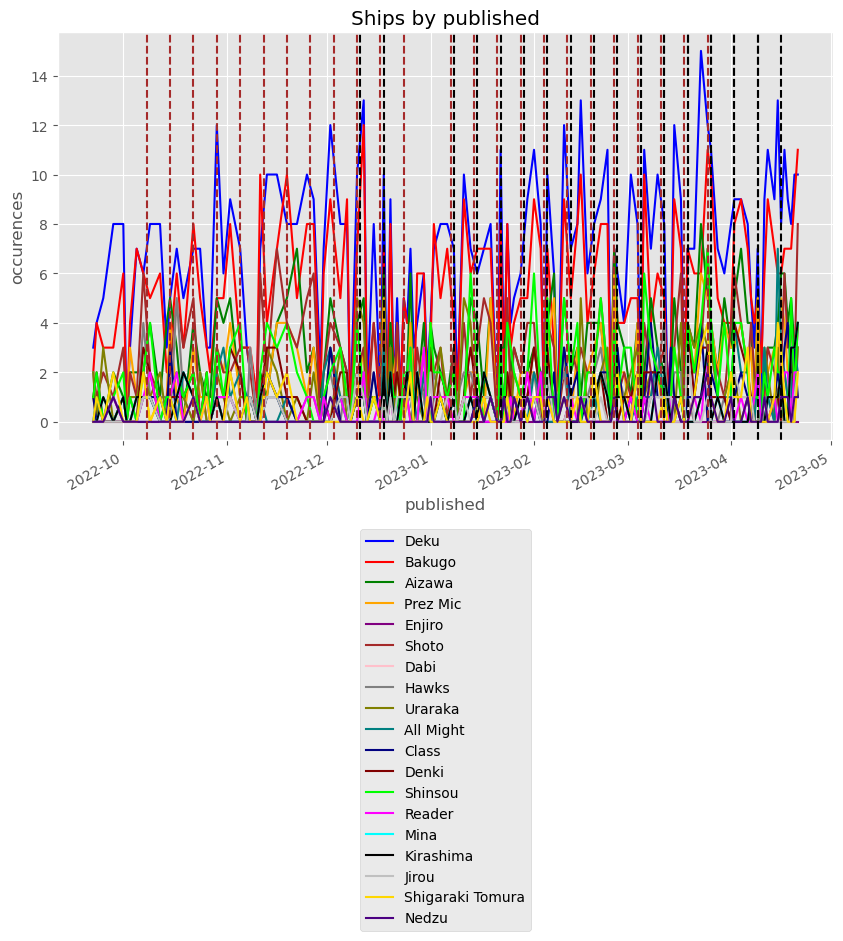

In [51]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


season_six_ships_only.plot(color = colors)
plt.ylabel('occurences')
plt.title('Ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
for i in range(1, 25):
    plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
plt.show()

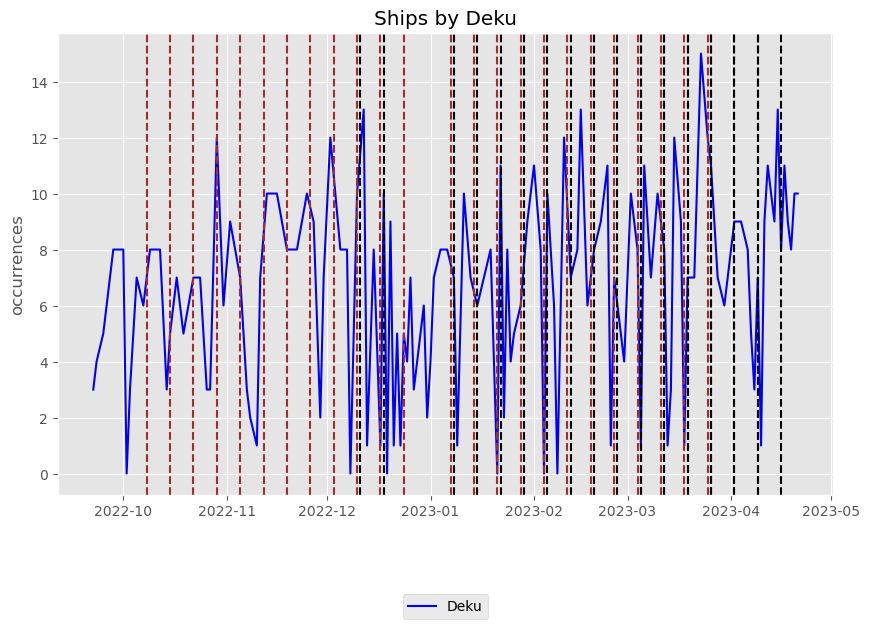

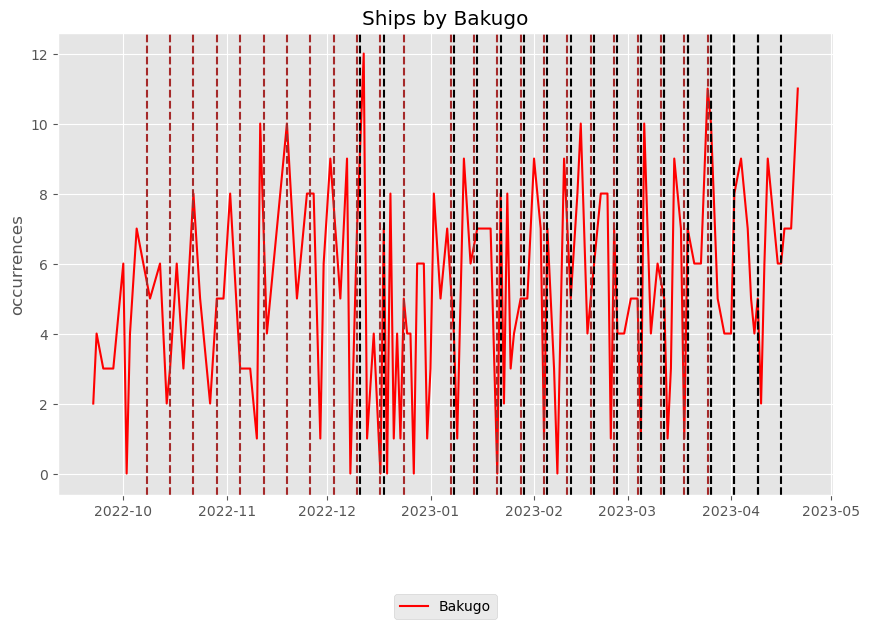

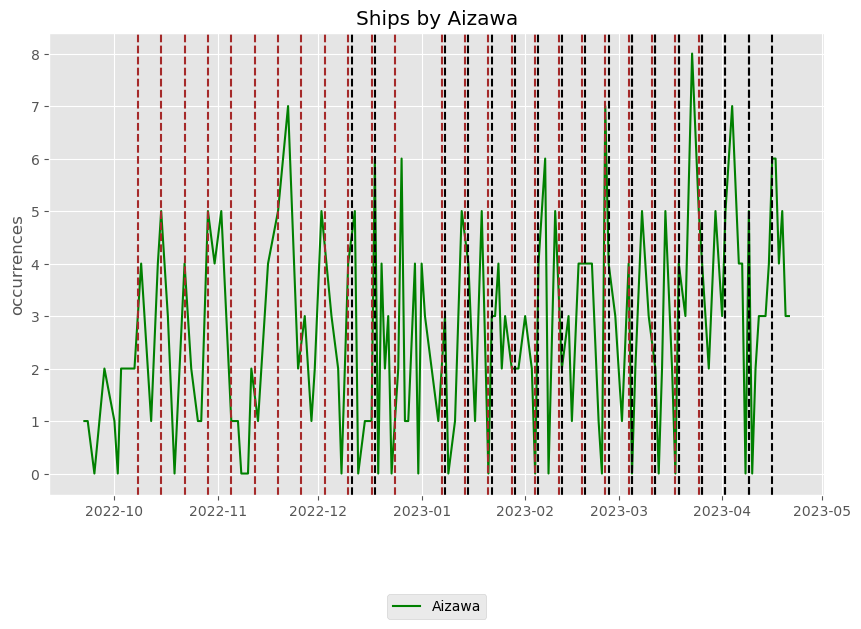

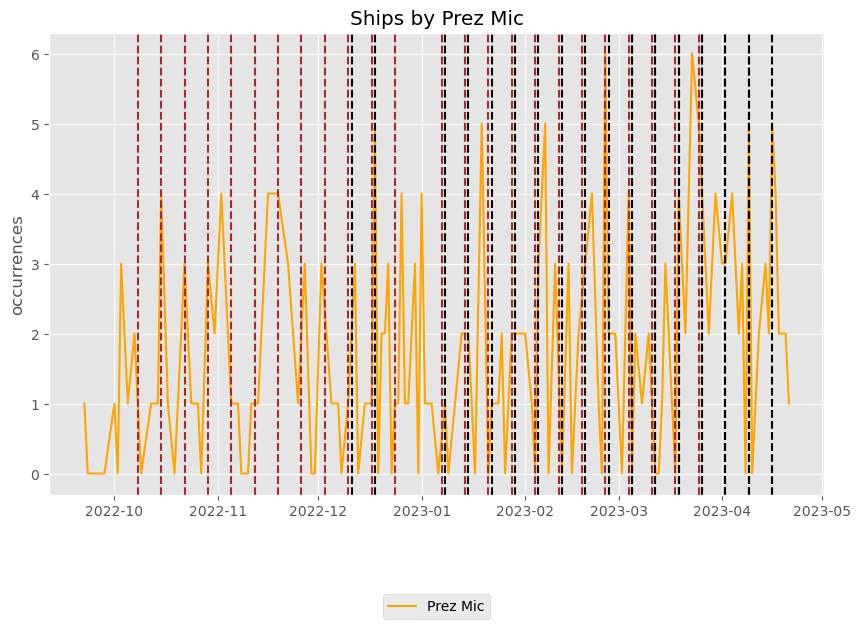

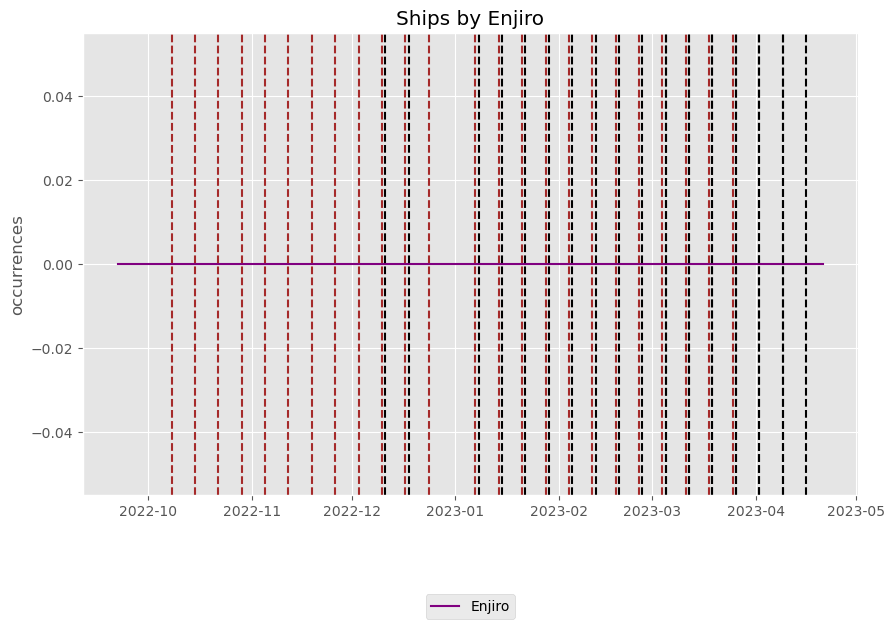

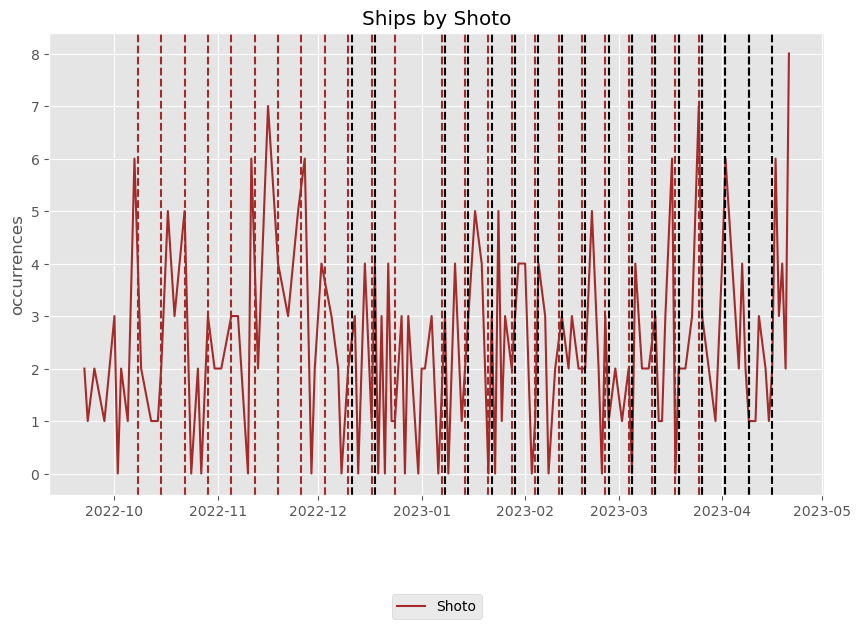

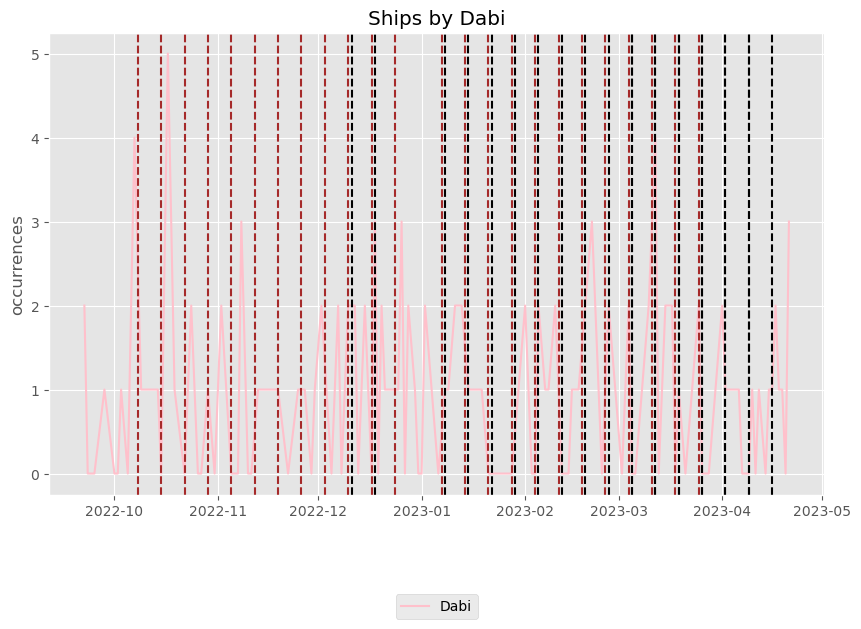

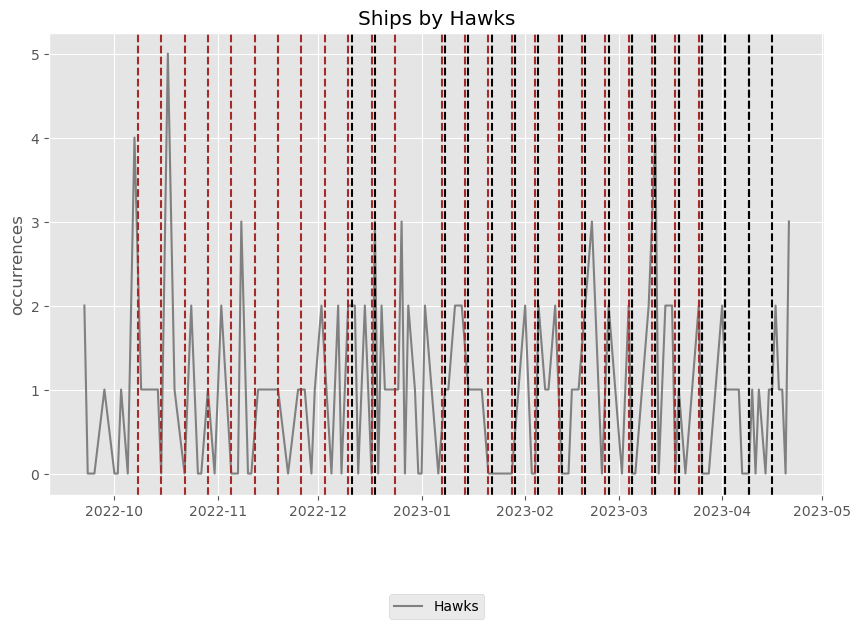

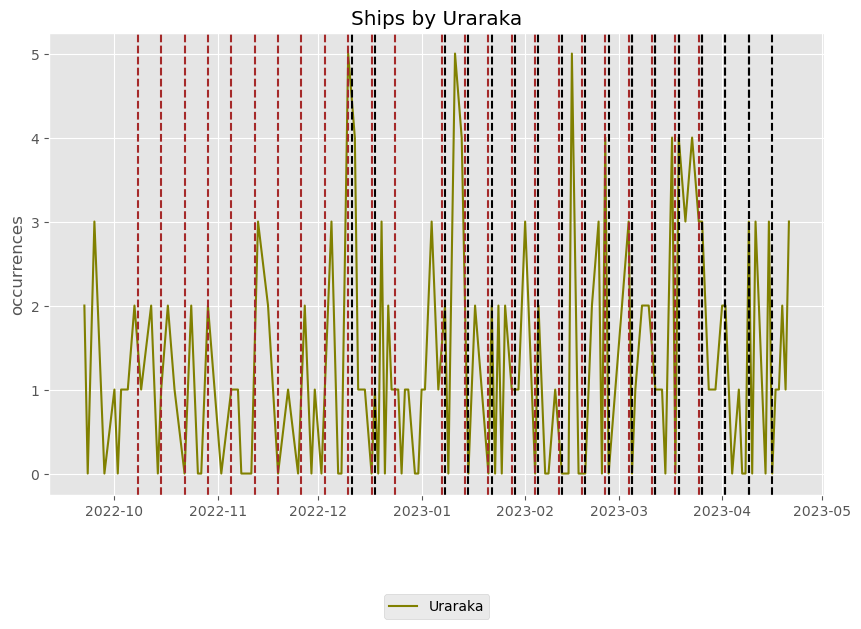

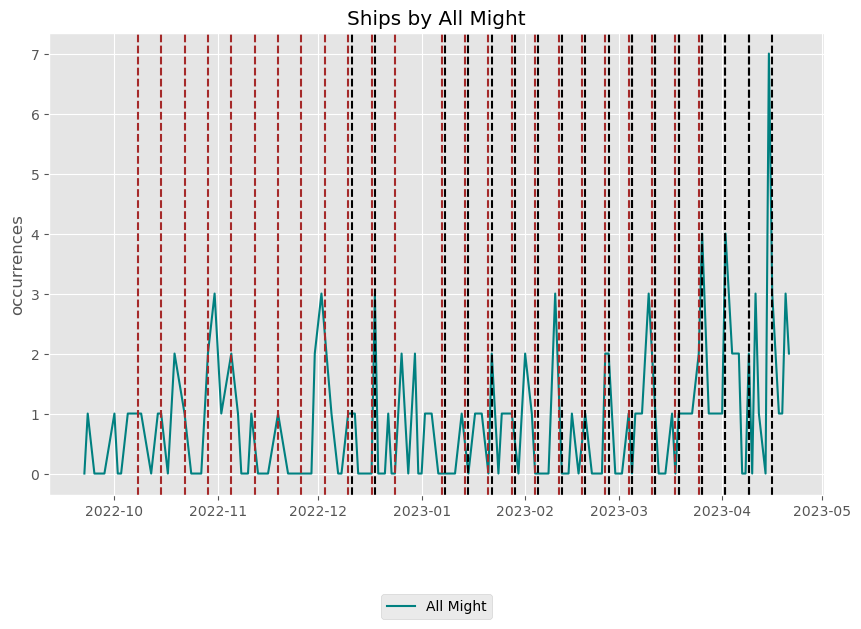

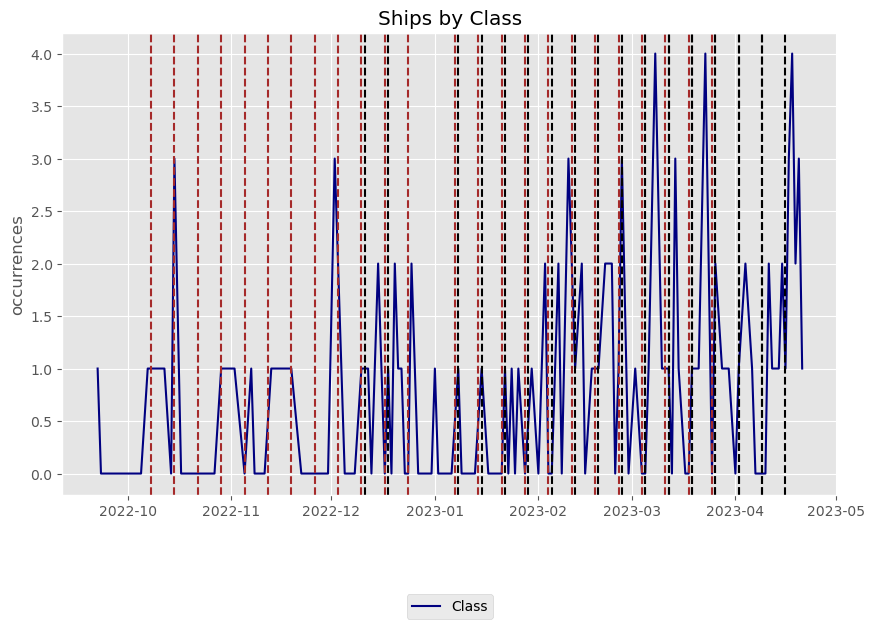

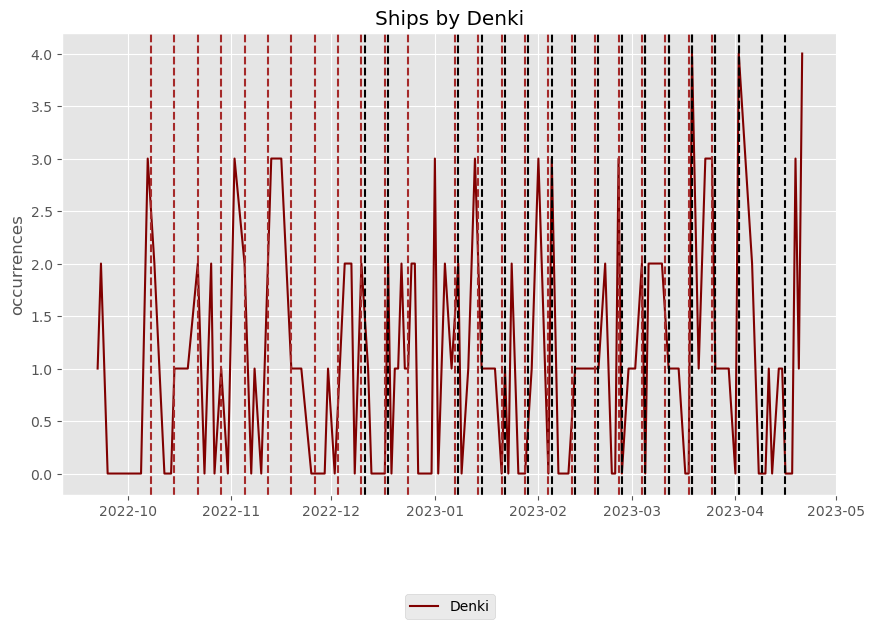

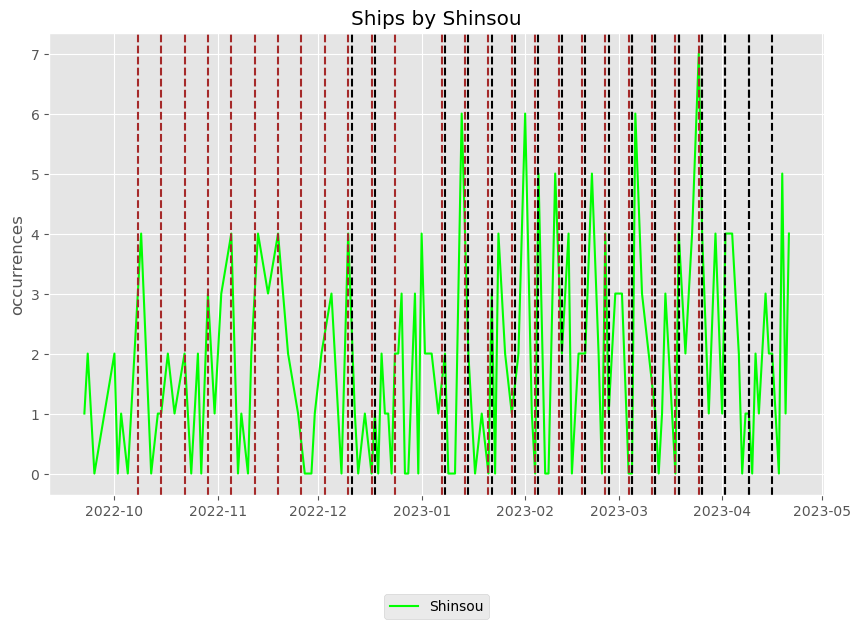

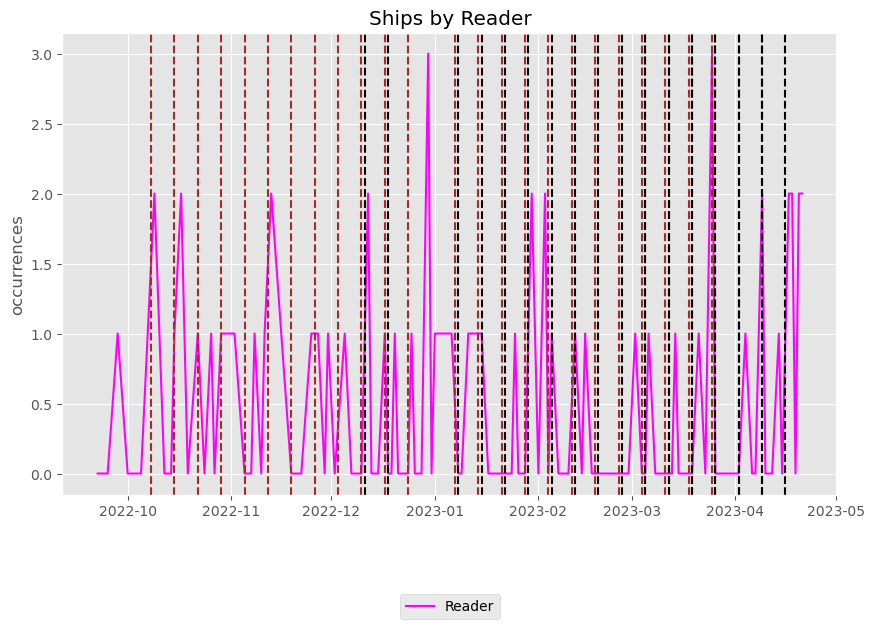

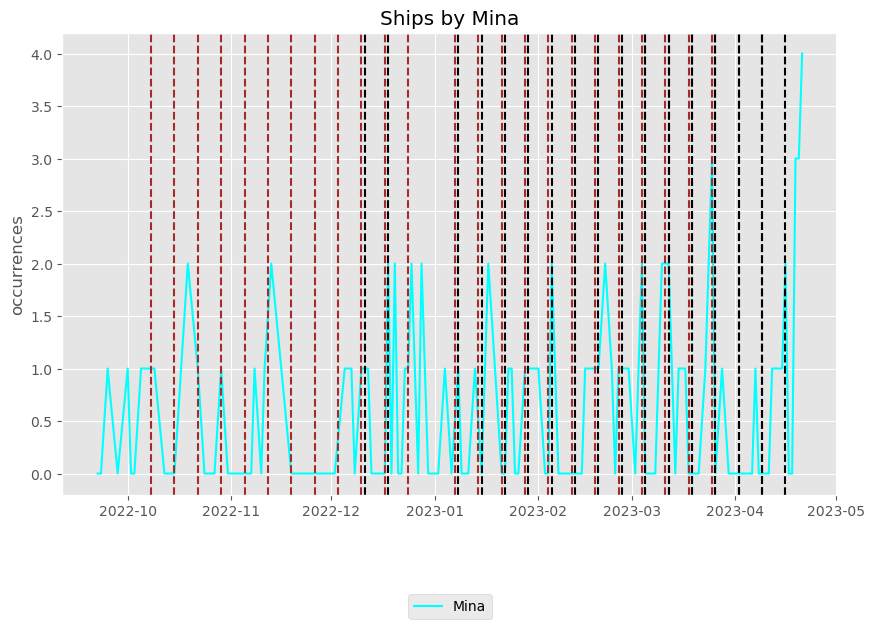

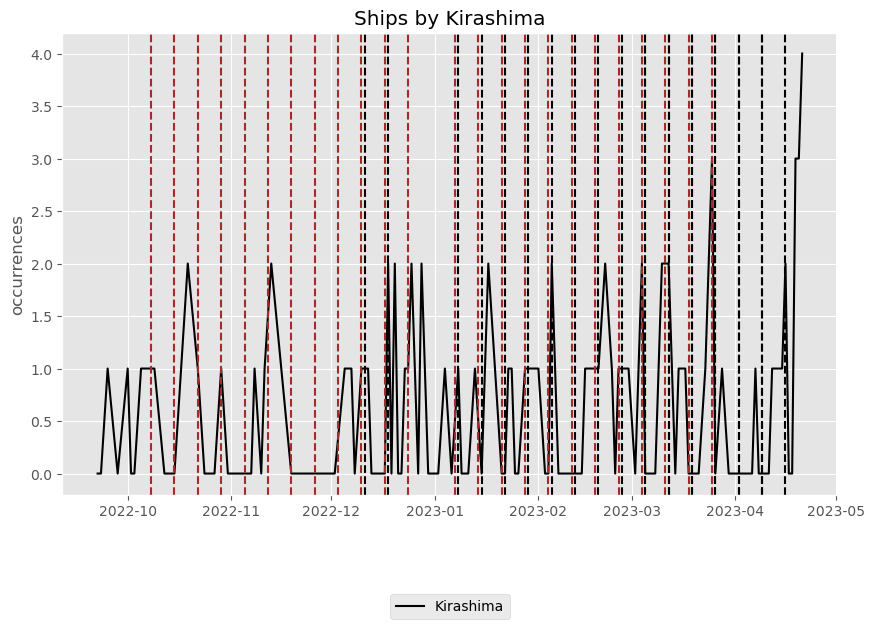

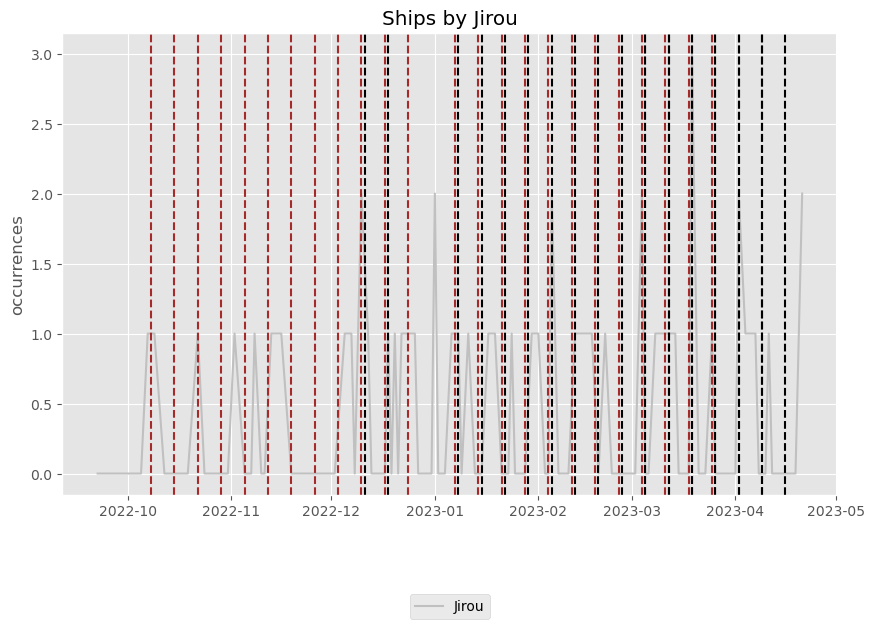

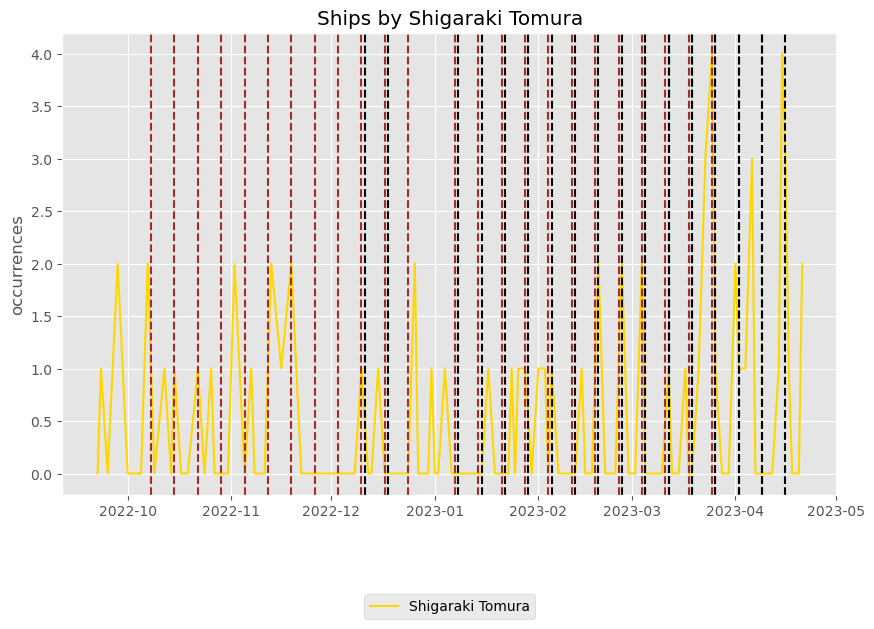

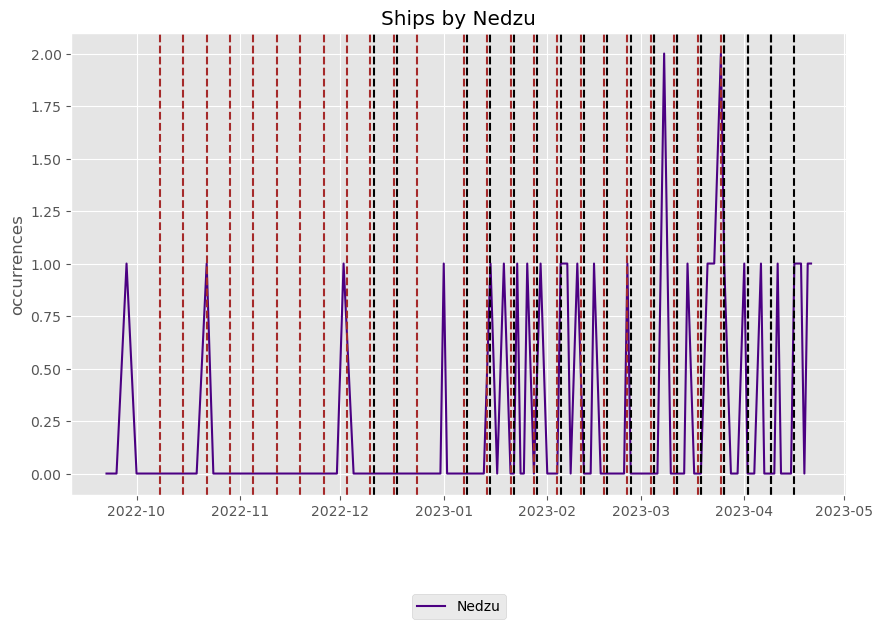

In [53]:

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']

for col in season_six_ships_only.columns:
    plt.figure() # create a new figure for each plot
    plt.plot(season_six_ships_only[col], color=colors[season_six_ships_only.columns.get_loc(col)])
    plt.ylabel('occurrences')
    plt.title('Ships by ' + col)
    plt.legend([col], bbox_to_anchor=(0.5, -0.2), loc='upper center')
    for i in range(1, 24):
        plt.axvline(x=season_six_anime['English_Air_Date'][i], color='black', linestyle = '--')
    for i in range(1, 25):
        plt.axvline(x=season_six_anime['Original_Air_Date'][i], color='brown', linestyle = '--')
    plt.show()


In [56]:
AO3.to_csv('AO3_ships_spread.csv', index = False)